In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [6]:
class BNet:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function,bias_initialiser=bias_initialiser):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.weights.append(initialiser_function(input_dim,hidden_layer_sizes[0]))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii],hidden_layer_sizes[ii+1]))
            self.biases.append(bias_initialiser(hidden_layer_sizes[ii]))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1],output_dim))
        self.biases.append(bias_initialiser(hidden_layer_sizes[-1]))
        self.biases.append(bias_initialiser(output_dim))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        for ii in range(len(self.weights)):
#             print(ii)
#             print(x.shape)
#             print(self.weights[ii].shape)
#             print(self.biases[ii].shape)
            x=x @ self.weights[ii]+self.biases[ii]
            self.activated.append(x>0)
            self.z.append(x)
            if not ii== len(self.weights)-1:
                x=x*self.activated[ii]
#             print(x)
                if sum(sum(self.activated[ii]))==0:
                    print('No activations')
            self.a.append(x)
        self.activated[-1]=np.ones(self.activated[-1].shape,dtype=bool)
#             print(self.activated)
        return x
    
    def gradients(self,x,Y):
        Delta=[]
        Delta.append((Y-self.a[-1])*self.activated[-1])
        for ll in range(len(self.weights)-2,-1,-1):
            Delta.insert(0,(Delta[0] @ self.weights[ll+1].T)*self.activated[ll])
        
        grad_w=[]
#         self.Delta=Delta
#         print(Delta[0].shape)
        grad_w.append(Delta[0].T @ x)
        for ll in range(len(Delta)-1):

            grad_w.append(Delta[ll+1].T @ self.a[ll])
            
        return grad_w, Delta
    
    def train(self,xx,YY,alpha=0.01, print_error=False):
        
        for ii in range(len(YY)):
            x=xx[ii]
            Y=YY[ii]
#             print(x.shape)
#             print(Y.shape)
            Y_out=self.forward(x)
            error_out=np.sum((Y-Y_out)**2)
            grad_w,grad_b=self.gradients(x,Y)
#             print(self.biases)
            for ll in range(len(self.weights)):
#                 print(ll)
#                 print(grad_w[ll].shape)
                self.weights[ll]=self.weights[ll]+alpha*grad_w[ll].T
                self.biases[ll]+=alpha*grad_b[ll]
                
            if print_error:
                print(str(ii)+': Error: '+ str(error_out))
            

In [7]:
n_data=10001
x=np.random.rand(n_data,1)*4-2
y= 0.8*np.sin(x*6.4)+np.random.randn(x.shape[0],x.shape[1])*0.01

In [8]:
net=BNet(hidden_layer_sizes=[16,32,64],input_dim=1,output_dim=1)


In [9]:
net.forward(x[0])

array([[3.26969712]])

In [10]:

for ii in range(10):
    net.train(x,y,print_error=True,alpha=0.001/(4*ii+1))

0: Error: 6.470066998020453
1: Error: 8.021767293020767
2: Error: 21.519525903738312
3: Error: 4.9736244951201565
4: Error: 16.350548214169788
5: Error: 4.449209427835353
6: Error: 27.740893498123494
7: Error: 24.12047316020393
8: Error: 17.779747978475637
9: Error: 16.431838079166678
10: Error: 12.511564812065096
11: Error: 8.55926151569901
12: Error: 6.417537016775266
13: Error: 8.689450602569716
14: Error: 13.789103967656413
15: Error: 16.651677971126297
16: Error: 0.42215246083357494
17: Error: 1.1957479691866826
18: Error: 8.083020352451499
19: Error: 17.4317150426816
20: Error: 5.292888593229054
21: Error: 8.324949464810643
22: Error: 3.8890418453032742
23: Error: 4.841694972254737
24: Error: 4.922198343099624
25: Error: 4.335926113585859
26: Error: 15.765511935565033
27: Error: 13.14266381680124
28: Error: 1.710113463117991
29: Error: 4.046768773119396
30: Error: 2.5846726870642622
31: Error: 5.9334868265055905
32: Error: 9.409543465844639
33: Error: 11.920199357380536
34: Error

763: Error: 0.10862736539833244
764: Error: 0.09375469091007001
765: Error: 0.17408488472983705
766: Error: 0.060373857615969626
767: Error: 0.01066524424776371
768: Error: 0.15215968547169667
769: Error: 0.24377149517382427
770: Error: 0.04284572538272201
771: Error: 0.010754724301917004
772: Error: 0.1555220918226615
773: Error: 0.766579598207515
774: Error: 0.05878085185549801
775: Error: 0.39146270062543564
776: Error: 0.011503005425761026
777: Error: 0.08173895946846715
778: Error: 0.1068520442572501
779: Error: 0.15978813769176414
780: Error: 0.01227906526049607
781: Error: 0.1777209769899255
782: Error: 0.003167294234358514
783: Error: 0.051259822720875856
784: Error: 0.07012276041712404
785: Error: 0.03157500411184291
786: Error: 7.575704886127977e-05
787: Error: 0.09549386846983292
788: Error: 0.0006033166092334246
789: Error: 0.08274538555037603
790: Error: 0.27856395428067066
791: Error: 0.1791540287053676
792: Error: 0.008628847678008375
793: Error: 0.0035052830949669927
79

1667: Error: 0.16448279857088502
1668: Error: 0.005808664254306065
1669: Error: 0.02125680657367714
1670: Error: 0.015321865441022183
1671: Error: 0.14198909738729318
1672: Error: 0.6022047224392101
1673: Error: 0.11166781535253052
1674: Error: 0.02882208828331111
1675: Error: 0.017064300818341285
1676: Error: 0.5581988719302504
1677: Error: 0.06969826448558818
1678: Error: 0.12262065716190639
1679: Error: 0.06413851389965955
1680: Error: 0.12673789105384795
1681: Error: 0.007819877774500033
1682: Error: 0.020006194389185147
1683: Error: 0.23101590240979153
1684: Error: 0.032704934424726814
1685: Error: 0.48125664299915966
1686: Error: 0.1376393564745625
1687: Error: 0.048439636098064114
1688: Error: 0.25634908980066207
1689: Error: 0.046411322057284765
1690: Error: 0.054166619893885444
1691: Error: 0.08156616040116277
1692: Error: 0.2816407527133843
1693: Error: 0.6368948470811838
1694: Error: 0.07480162124819914
1695: Error: 0.12745186033683598
1696: Error: 0.08856605798874803
1697: 

2664: Error: 0.17786441646544923
2665: Error: 0.050516811511953204
2666: Error: 0.09201986144264887
2667: Error: 0.1448723957472336
2668: Error: 0.0001920719995048651
2669: Error: 0.1081974627115851
2670: Error: 0.05927675650920343
2671: Error: 0.010067532082833185
2672: Error: 0.05294147206040501
2673: Error: 0.023124038566165774
2674: Error: 0.009558837347260069
2675: Error: 0.006132399808121634
2676: Error: 0.015983844124024815
2677: Error: 0.2786286895458744
2678: Error: 0.008789541923157344
2679: Error: 0.02662853303896639
2680: Error: 0.05759123093649137
2681: Error: 0.09836062513987577
2682: Error: 0.009800758502889468
2683: Error: 0.00995267943035054
2684: Error: 0.23712041057709213
2685: Error: 0.004375023901648776
2686: Error: 0.004207121616165213
2687: Error: 0.013287430235849723
2688: Error: 0.6083770462029694
2689: Error: 0.009042601346402963
2690: Error: 0.008397372564292056
2691: Error: 0.20169308277581827
2692: Error: 0.023812634318481178
2693: Error: 0.0013282711907298

3659: Error: 0.34725814193254945
3660: Error: 0.002275591466455618
3661: Error: 0.015173756203119757
3662: Error: 0.044900999162258794
3663: Error: 0.023253147314986823
3664: Error: 0.10518855800630557
3665: Error: 0.5665580212160043
3666: Error: 0.007038319298670437
3667: Error: 0.004636701273250385
3668: Error: 0.14015903710893562
3669: Error: 0.05247465680504852
3670: Error: 0.11693510542728008
3671: Error: 0.0002181307198576796
3672: Error: 0.09693895333267477
3673: Error: 0.22743985292813584
3674: Error: 0.0020077782807888882
3675: Error: 0.1584621083395039
3676: Error: 0.0009177031371197838
3677: Error: 0.0017387757354059427
3678: Error: 0.04490239214586991
3679: Error: 0.009349156041785905
3680: Error: 0.03636615127546926
3681: Error: 0.00838098971170158
3682: Error: 0.030769335391910985
3683: Error: 0.023798728760718615
3684: Error: 4.754596984076798e-05
3685: Error: 0.00015969870283324912
3686: Error: 0.4957327653519317
3687: Error: 0.007247981187706575
3688: Error: 0.29896953

4597: Error: 0.33243264438048925
4598: Error: 0.004747281017138892
4599: Error: 0.0003818976597811696
4600: Error: 0.0003829698544142038
4601: Error: 0.009552209231779027
4602: Error: 0.2165019135095514
4603: Error: 0.12743095212354605
4604: Error: 0.01303455960766518
4605: Error: 0.0003383304468247578
4606: Error: 0.09009152367796572
4607: Error: 0.0037234036480018155
4608: Error: 0.31528426369917695
4609: Error: 0.033248002949480805
4610: Error: 0.0028768320143525115
4611: Error: 0.0007631374770319708
4612: Error: 0.0001735651083626661
4613: Error: 0.00279063950984843
4614: Error: 0.032771650602267555
4615: Error: 0.22376641167672678
4616: Error: 0.010165885738569526
4617: Error: 0.023808130005528415
4618: Error: 0.02023531310468242
4619: Error: 0.0012730257078277225
4620: Error: 0.009063565953381583
4621: Error: 0.03565311303649975
4622: Error: 0.033296135379133965
4623: Error: 0.0015602345270652241
4624: Error: 0.1605413902701182
4625: Error: 1.3274117181732885e-08
4626: Error: 0.0

5267: Error: 0.05157930019363949
5268: Error: 0.07799363571528366
5269: Error: 0.05460594746092136
5270: Error: 0.008710271501937742
5271: Error: 0.23075639118849284
5272: Error: 0.1340348307045113
5273: Error: 0.0998959037046081
5274: Error: 0.0007564167291701392
5275: Error: 0.14492142489045157
5276: Error: 0.017990577559912815
5277: Error: 0.10830938540395281
5278: Error: 0.070161618720382
5279: Error: 0.06428482592707097
5280: Error: 0.16059861517134189
5281: Error: 4.8197899709923065e-05
5282: Error: 0.06559484064532374
5283: Error: 0.00042906144753255095
5284: Error: 0.0050136164986268675
5285: Error: 0.04879997658165146
5286: Error: 0.2085939952111822
5287: Error: 0.13666631424131478
5288: Error: 0.04370425040917695
5289: Error: 0.034521020454507514
5290: Error: 0.010817812431581754
5291: Error: 0.24912800196280255
5292: Error: 0.0006345944077018734
5293: Error: 0.04633410157869838
5294: Error: 0.004667521301797672
5295: Error: 0.002140350780390424
5296: Error: 0.016100554791965

6227: Error: 0.038149857338908626
6228: Error: 0.03579137531167668
6229: Error: 0.03105445444052591
6230: Error: 0.040707399196805015
6231: Error: 0.002817109255139811
6232: Error: 0.00020064211250522455
6233: Error: 0.003989568629058778
6234: Error: 0.59789058090626
6235: Error: 0.3017908379926648
6236: Error: 0.000953400187045435
6237: Error: 0.0018041342212058405
6238: Error: 0.0007770989839887346
6239: Error: 0.11465291158403333
6240: Error: 3.4376345486216086e-06
6241: Error: 0.20265767734225115
6242: Error: 0.057115537739754065
6243: Error: 6.841578580841028e-06
6244: Error: 0.05643874595513251
6245: Error: 0.007094850326672466
6246: Error: 0.2083889339856106
6247: Error: 0.10822832225574061
6248: Error: 0.0002627286014980533
6249: Error: 0.0006998512601677745
6250: Error: 0.07662465213507129
6251: Error: 0.3590899974712573
6252: Error: 0.004481282330969602
6253: Error: 1.3283510665395019e-05
6254: Error: 0.046686933692809914
6255: Error: 0.015741433060636356
6256: Error: 0.00024

7164: Error: 0.0446091535281659
7165: Error: 0.044694130513034745
7166: Error: 1.8665262799678596e-05
7167: Error: 0.07393803862494164
7168: Error: 0.019317907303614695
7169: Error: 0.27987164530654457
7170: Error: 0.0038901997902977613
7171: Error: 5.495173449033097e-05
7172: Error: 0.2376647916009822
7173: Error: 0.038497356921548015
7174: Error: 0.0002471428193152959
7175: Error: 0.03172741327181922
7176: Error: 0.06536785334441149
7177: Error: 0.0013341630500201393
7178: Error: 0.0047510087576533334
7179: Error: 0.02073831248735439
7180: Error: 0.0014218835700213503
7181: Error: 0.04691560665461092
7182: Error: 0.154965218092125
7183: Error: 0.008067636894002762
7184: Error: 0.0013519937474393174
7185: Error: 0.008429354787335107
7186: Error: 0.001641251896778886
7187: Error: 0.27552999075153595
7188: Error: 0.21530469685275733
7189: Error: 0.00032934616799458406
7190: Error: 0.15779982398137568
7191: Error: 4.9842592575600436e-06
7192: Error: 0.07151007534985312
7193: Error: 0.013

8027: Error: 0.011103664845350086
8028: Error: 0.00994908711323518
8029: Error: 0.0020983134890821243
8030: Error: 0.03124464938626082
8031: Error: 0.1941394604956509
8032: Error: 0.28085538487853895
8033: Error: 0.01674160401514488
8034: Error: 0.020991661067180045
8035: Error: 0.0018455503624124692
8036: Error: 0.0012453854399147508
8037: Error: 0.1580278582289056
8038: Error: 0.0938557761418744
8039: Error: 0.04970119999056444
8040: Error: 0.0035167850398916253
8041: Error: 0.1096125087581367
8042: Error: 0.05609979412325927
8043: Error: 0.15662039922857515
8044: Error: 0.01303482752539671
8045: Error: 0.0002970256794801493
8046: Error: 0.03118343205001805
8047: Error: 0.007896006351467127
8048: Error: 0.002077525046710063
8049: Error: 0.00013341385187863513
8050: Error: 0.012176862445734677
8051: Error: 0.008567220366470674
8052: Error: 0.24165339703512276
8053: Error: 0.0017604994773690787
8054: Error: 0.005537560320213652
8055: Error: 0.011660485007647759
8056: Error: 0.022611823

8959: Error: 4.076780383112311e-05
8960: Error: 0.0005701569491429119
8961: Error: 0.10204408211064808
8962: Error: 0.031613471104972785
8963: Error: 0.10364165128140002
8964: Error: 0.03731370918751201
8965: Error: 0.008272275089340753
8966: Error: 0.00032276353745109383
8967: Error: 0.016213957558914218
8968: Error: 0.04704872452265385
8969: Error: 0.011370842834348745
8970: Error: 0.21743256181030565
8971: Error: 2.084087560398923e-05
8972: Error: 0.001457222734178992
8973: Error: 0.0664413015126901
8974: Error: 0.09887495593950084
8975: Error: 0.0005177952548740121
8976: Error: 0.19623950646503782
8977: Error: 0.015089905841775123
8978: Error: 0.0023779455383271535
8979: Error: 0.035890070309319254
8980: Error: 1.4417433244262081e-05
8981: Error: 0.006538472376198851
8982: Error: 5.347396875874211e-05
8983: Error: 0.03737128726121053
8984: Error: 0.001697936570150348
8985: Error: 0.002495199744638084
8986: Error: 0.0005436777324698987
8987: Error: 0.02908218639225637
8988: Error: 0

9906: Error: 0.1768816549980354
9907: Error: 0.02616622580385768
9908: Error: 0.023322781327792697
9909: Error: 0.01711122917551961
9910: Error: 0.14264407458963976
9911: Error: 0.0011023483107633568
9912: Error: 0.0011903904900231208
9913: Error: 0.2470581727906196
9914: Error: 0.0007904543225152939
9915: Error: 0.0007330642588351525
9916: Error: 0.253006498788309
9917: Error: 0.0017838757358676388
9918: Error: 0.038238583219840444
9919: Error: 9.67493794368737e-06
9920: Error: 0.005846093017828955
9921: Error: 0.001111418900336884
9922: Error: 0.025227438148790013
9923: Error: 0.008994653410063497
9924: Error: 0.03212787593101028
9925: Error: 0.12204727010638346
9926: Error: 0.0002339025781186068
9927: Error: 0.0034333307252356377
9928: Error: 0.014163641196276108
9929: Error: 0.004637749072568725
9930: Error: 0.0001351759504697597
9931: Error: 0.0017490598332392812
9932: Error: 0.015445830773570366
9933: Error: 0.0006239886227402858
9934: Error: 0.00013098530601592838
9935: Error: 9

876: Error: 0.004070467769399227
877: Error: 0.28058072631086256
878: Error: 0.14648518589661846
879: Error: 0.004720204541030686
880: Error: 1.536069482571755e-07
881: Error: 0.014444146496139822
882: Error: 0.01618721717058102
883: Error: 0.013834831839357525
884: Error: 0.0037967538446934714
885: Error: 0.01822573539586599
886: Error: 0.17159229901194015
887: Error: 0.021906871446331844
888: Error: 1.9422051259912644e-05
889: Error: 0.010061098338472295
890: Error: 0.017951323139494876
891: Error: 0.0019289074135595012
892: Error: 0.028952573365586015
893: Error: 0.0001834791020891331
894: Error: 0.0007210597456497081
895: Error: 0.00888533301963262
896: Error: 0.1132270856425683
897: Error: 0.016227336024571732
898: Error: 0.004463957933114718
899: Error: 0.0013120244574147174
900: Error: 0.17223163577736708
901: Error: 0.1048303393682949
902: Error: 0.1453748046622985
903: Error: 0.013301725683196491
904: Error: 3.433502614052797e-05
905: Error: 0.19948837759548876
906: Error: 0.0

1819: Error: 0.00013556720647904473
1820: Error: 0.003699562841283279
1821: Error: 0.0007506866247891145
1822: Error: 0.0018014929301661195
1823: Error: 0.00035000016714412194
1824: Error: 4.437765978361929e-06
1825: Error: 0.00013489905529492555
1826: Error: 0.10930021405292323
1827: Error: 3.5890751227855886e-05
1828: Error: 0.007209787394391814
1829: Error: 0.06337740390136615
1830: Error: 0.2133633886589552
1831: Error: 0.054228247660798375
1832: Error: 0.0033542790681913496
1833: Error: 0.005568102704280548
1834: Error: 0.032373097337751275
1835: Error: 0.0010996059609993916
1836: Error: 0.006038910083031225
1837: Error: 0.0004980524605981629
1838: Error: 0.0011627389520357488
1839: Error: 3.590408475151968e-05
1840: Error: 0.0015150548551242822
1841: Error: 0.002697793796317493
1842: Error: 0.0012283791049024853
1843: Error: 0.006292076371922774
1844: Error: 3.195964221351287e-05
1845: Error: 0.013394554647504298
1846: Error: 0.028815708753877626
1847: Error: 0.000914297841416631

2570: Error: 1.4406013622050687e-06
2571: Error: 0.02678962144135329
2572: Error: 0.002772811901456256
2573: Error: 0.0031212415053950564
2574: Error: 6.243353840959073e-06
2575: Error: 0.0005969611018083912
2576: Error: 0.0020949664663299263
2577: Error: 0.00017235042554727785
2578: Error: 0.0003513195660991161
2579: Error: 8.885761184023587e-05
2580: Error: 0.00086361542461732
2581: Error: 0.0021507231322496893
2582: Error: 0.008583262898832005
2583: Error: 0.04858580976013952
2584: Error: 0.07235454022884893
2585: Error: 0.017680737278522655
2586: Error: 0.18335797174431462
2587: Error: 0.32884609752820887
2588: Error: 0.0010013658330840318
2589: Error: 0.01289891024915364
2590: Error: 0.0007360664721048282
2591: Error: 0.002594730370640107
2592: Error: 0.1310428633940497
2593: Error: 0.01369303988725837
2594: Error: 0.0023678984774331926
2595: Error: 0.06458412220972205
2596: Error: 0.0006561152339523551
2597: Error: 0.0008731873577133864
2598: Error: 0.06241340474334046
2599: Erro

3498: Error: 0.04235822420357438
3499: Error: 0.007839715851756584
3500: Error: 0.050151641586458524
3501: Error: 0.0009124556476350047
3502: Error: 0.0016171779102545339
3503: Error: 0.00862952523701732
3504: Error: 0.01742725965256881
3505: Error: 0.1249889116695291
3506: Error: 0.06372468108827306
3507: Error: 0.0008993983805294744
3508: Error: 0.25395605554304035
3509: Error: 0.006630290211714644
3510: Error: 0.0005556775466564189
3511: Error: 0.016164526102177088
3512: Error: 0.002217640361446105
3513: Error: 0.021051657862826496
3514: Error: 0.14667295367545108
3515: Error: 0.0015790570224950163
3516: Error: 0.004696491711020105
3517: Error: 0.13184272922624712
3518: Error: 0.001766385143264632
3519: Error: 0.04988196665427542
3520: Error: 0.006108554643647387
3521: Error: 0.01127803815456466
3522: Error: 0.10267289723351783
3523: Error: 0.0024870269706827623
3524: Error: 0.04570021083726602
3525: Error: 0.0012918457668720225
3526: Error: 0.00312213549282159
3527: Error: 0.000252

4305: Error: 0.000707417649549942
4306: Error: 0.00020095837900045295
4307: Error: 0.039879713873948335
4308: Error: 0.40336938407664685
4309: Error: 0.09895919275501124
4310: Error: 0.00024340626614262768
4311: Error: 0.01107250619421282
4312: Error: 2.7909476527623642e-05
4313: Error: 0.0012444035979542302
4314: Error: 0.00626326566655701
4315: Error: 0.005530474153042158
4316: Error: 0.0021971218993944368
4317: Error: 2.2145130632716386e-06
4318: Error: 5.784002961336702e-05
4319: Error: 0.000739415937298998
4320: Error: 0.00996685932297298
4321: Error: 0.0020085608666640326
4322: Error: 0.0011837392689237219
4323: Error: 0.011434768392166565
4324: Error: 0.11215198296519338
4325: Error: 0.0013770900214776626
4326: Error: 0.16243586088928935
4327: Error: 0.003672872085307075
4328: Error: 0.002868570904616749
4329: Error: 0.007223611250248094
4330: Error: 0.026785533976714366
4331: Error: 0.48900784123971697
4332: Error: 0.0007363459995212299
4333: Error: 0.00043049912303993044
4334:

5267: Error: 0.019502053650849845
5268: Error: 0.10646314237220178
5269: Error: 0.07857888094446841
5270: Error: 0.003142867163622365
5271: Error: 0.18569169367309096
5272: Error: 0.05635864928818218
5273: Error: 0.06130313450198028
5274: Error: 0.0011536733333742612
5275: Error: 0.13148602323466801
5276: Error: 0.03130174155966789
5277: Error: 0.06037325310350293
5278: Error: 0.05771800496574476
5279: Error: 0.04471598959570806
5280: Error: 0.1568770808712522
5281: Error: 0.000449219741624011
5282: Error: 0.051768415210707935
5283: Error: 5.615517866604073e-07
5284: Error: 0.0005982324215649427
5285: Error: 0.04948788864811917
5286: Error: 0.05236117483514415
5287: Error: 0.2246026862701005
5288: Error: 0.020069697815441375
5289: Error: 0.016895395870360555
5290: Error: 5.8813818270791614e-05
5291: Error: 0.09454363768832695
5292: Error: 0.0009409694288856842
5293: Error: 0.005368612765499621
5294: Error: 0.0018598254537237618
5295: Error: 7.906444372095116e-05
5296: Error: 0.01980231

6258: Error: 0.007282556496432712
6259: Error: 3.747349299351293e-05
6260: Error: 0.00954933309426254
6261: Error: 0.003331849959440783
6262: Error: 0.07254875304657053
6263: Error: 0.021006037469886166
6264: Error: 0.000481192940037773
6265: Error: 0.000839016974434202
6266: Error: 0.007160286644799102
6267: Error: 0.0013780048564726506
6268: Error: 0.0001743676583045364
6269: Error: 0.001963437770023454
6270: Error: 0.20180698907396347
6271: Error: 0.00040734674798606555
6272: Error: 0.0021752098384251006
6273: Error: 0.0030289222373074552
6274: Error: 0.0007267141791622532
6275: Error: 0.18274256747742107
6276: Error: 0.05902131275852333
6277: Error: 0.08020729822081724
6278: Error: 0.10647078617951951
6279: Error: 0.01949116706265275
6280: Error: 0.08306416965734467
6281: Error: 0.0008164548592844077
6282: Error: 0.020527872401443954
6283: Error: 0.22253332708608187
6284: Error: 0.0006404088349258652
6285: Error: 0.15813682327826226
6286: Error: 0.18914072899258946
6287: Error: 0.1

6991: Error: 0.001074956410705581
6992: Error: 0.0035078755648203165
6993: Error: 0.0477015889589489
6994: Error: 0.0004481960756511582
6995: Error: 0.15304433648124052
6996: Error: 0.00039759791866228835
6997: Error: 0.04946092468333184
6998: Error: 0.05289288592042686
6999: Error: 0.018932743673357354
7000: Error: 0.0004614543466120034
7001: Error: 0.008892341898636507
7002: Error: 0.020051504637741815
7003: Error: 0.006851324703717581
7004: Error: 0.010558746797130472
7005: Error: 0.19062043601737036
7006: Error: 0.039060654448902526
7007: Error: 2.978516300711853e-05
7008: Error: 0.0015238559468335828
7009: Error: 0.024841761269847395
7010: Error: 0.003892980581543195
7011: Error: 0.0038974941907455856
7012: Error: 0.09110393239480184
7013: Error: 0.009194095836681774
7014: Error: 5.178496192496914e-05
7015: Error: 0.04777310801412507
7016: Error: 0.0009905665285348884
7017: Error: 0.1568406221691717
7018: Error: 0.00036425001631873406
7019: Error: 0.008885200298441148
7020: Error:

7937: Error: 0.12573580555693933
7938: Error: 0.001767391003745989
7939: Error: 0.08016731684548092
7940: Error: 6.441571603742277e-05
7941: Error: 0.1949127893734953
7942: Error: 0.006509165431956286
7943: Error: 5.283667121790869e-05
7944: Error: 0.0003917444102318857
7945: Error: 0.011355897930411203
7946: Error: 0.01117608866376237
7947: Error: 0.09937943557216589
7948: Error: 0.0012747134596019214
7949: Error: 0.0005553670635029557
7950: Error: 0.18783746208134625
7951: Error: 0.00028302005596872714
7952: Error: 0.0014806102278977665
7953: Error: 0.005482096297367043
7954: Error: 7.283911467660255e-05
7955: Error: 0.002492820197030502
7956: Error: 0.0019252334245382315
7957: Error: 0.0011177445515028308
7958: Error: 0.0005354639640671068
7959: Error: 0.21080555068592946
7960: Error: 6.778817457848692e-07
7961: Error: 6.514549157183383e-06
7962: Error: 0.0007694348585362299
7963: Error: 0.08431339011170734
7964: Error: 0.0007699893622346788
7965: Error: 0.0005436728816725467
7966: 

8890: Error: 0.25507271422518407
8891: Error: 0.09674539643422188
8892: Error: 0.0005359456364712706
8893: Error: 0.029276426079049917
8894: Error: 0.35215359778167404
8895: Error: 0.1228446248958827
8896: Error: 0.10521730518512865
8897: Error: 0.014625083141503717
8898: Error: 0.0024631022090789464
8899: Error: 0.1743014519463587
8900: Error: 0.002453514801584289
8901: Error: 0.04089216447855038
8902: Error: 0.0014305708353196268
8903: Error: 0.012872981541038116
8904: Error: 0.1810978654951908
8905: Error: 0.03917202351153985
8906: Error: 0.0032217351689022315
8907: Error: 2.8965504400035755e-06
8908: Error: 0.0013170995636896385
8909: Error: 0.0012214432202661057
8910: Error: 3.141063584742746e-06
8911: Error: 0.11056384950113962
8912: Error: 7.697570027469698e-05
8913: Error: 0.012306921936730027
8914: Error: 0.09446014313463909
8915: Error: 0.008026462542508843
8916: Error: 0.0016029503227253518
8917: Error: 0.1258576531814596
8918: Error: 0.1419649372751659
8919: Error: 2.892894

9830: Error: 0.03993833781367784
9831: Error: 0.00155566256318935
9832: Error: 0.0014341183263215636
9833: Error: 0.04464867376416653
9834: Error: 0.01828363026671591
9835: Error: 0.718250978898343
9836: Error: 0.00207322626557755
9837: Error: 0.055109337171203955
9838: Error: 0.004726462645233314
9839: Error: 0.008277109612156932
9840: Error: 0.0004480983661741592
9841: Error: 0.00011081953273684232
9842: Error: 0.010113557360678609
9843: Error: 0.13408120292154643
9844: Error: 0.0030536589672415944
9845: Error: 0.4121755704463545
9846: Error: 0.0008893040500635716
9847: Error: 0.004943256003708325
9848: Error: 4.4470139578102324e-05
9849: Error: 0.061271184404536286
9850: Error: 0.00045708052151742555
9851: Error: 0.01312462215294423
9852: Error: 0.00013326988156217587
9853: Error: 0.05485924537980953
9854: Error: 4.91060773743288e-05
9855: Error: 0.001072669746617604
9856: Error: 0.01783871986003408
9857: Error: 0.0018084441397484407
9858: Error: 0.0018188956428478527
9859: Error: 5

769: Error: 0.004650478059769715
770: Error: 0.001495152063663438
771: Error: 1.2013293425587762e-05
772: Error: 0.02876335664225556
773: Error: 0.07008766073405756
774: Error: 0.20569558814511432
775: Error: 0.1950507262583121
776: Error: 0.00043627860876185675
777: Error: 0.0020092914389391713
778: Error: 0.09506711301490078
779: Error: 0.014238702445710101
780: Error: 0.02796759053425362
781: Error: 0.007553917640303061
782: Error: 0.0008585574259994425
783: Error: 7.11104167536526e-05
784: Error: 0.02846038267573301
785: Error: 0.0003580590464235166
786: Error: 0.00038329379798697846
787: Error: 0.000358168007232535
788: Error: 0.33013394015612635
789: Error: 0.014007899305556206
790: Error: 0.13841619863263727
791: Error: 0.0032876217273647697
792: Error: 0.005132237920176138
793: Error: 0.0015198551229901101
794: Error: 9.446615034447218e-05
795: Error: 0.34300075701137583
796: Error: 0.0003046163570885661
797: Error: 0.0013042031983985327
798: Error: 0.00013949727063339447
799: 

1733: Error: 0.00016482724280334228
1734: Error: 0.0005545715772350364
1735: Error: 0.07926177061409499
1736: Error: 3.6087526318364497e-05
1737: Error: 0.0004412372581067132
1738: Error: 0.0023517464089564603
1739: Error: 0.001042427959073796
1740: Error: 0.1199214688008163
1741: Error: 0.16630408248003348
1742: Error: 0.35339601694721506
1743: Error: 0.0023646021133739386
1744: Error: 0.00010759710592447956
1745: Error: 0.0026793248365716885
1746: Error: 0.09571447631048101
1747: Error: 0.0044660599427728594
1748: Error: 0.015152247209919888
1749: Error: 0.141891811703408
1750: Error: 0.18577258057807397
1751: Error: 0.0006593476592953738
1752: Error: 7.483880820344777e-05
1753: Error: 0.0004670263204337947
1754: Error: 0.0008973320037295506
1755: Error: 0.14472127703392973
1756: Error: 0.0841645148514536
1757: Error: 0.000885562780440404
1758: Error: 0.004562399453501857
1759: Error: 0.004637402049582732
1760: Error: 0.011407391441265373
1761: Error: 0.0001750553163563479
1762: Erro

2655: Error: 0.008283930253338661
2656: Error: 0.010372387670941407
2657: Error: 0.05360166364974638
2658: Error: 0.00025150230251437647
2659: Error: 0.014975955618172032
2660: Error: 3.493825092733456e-05
2661: Error: 0.23684024435064477
2662: Error: 0.10232171135682089
2663: Error: 0.0005594376154978173
2664: Error: 0.0036479875948550932
2665: Error: 0.011829095409712052
2666: Error: 0.006502522070115451
2667: Error: 0.002868876448200856
2668: Error: 0.0003208173228757518
2669: Error: 0.003421679091225464
2670: Error: 0.007087757026026423
2671: Error: 0.003233825275625869
2672: Error: 0.014389877228150385
2673: Error: 0.0023003380586380804
2674: Error: 0.00055718163555291
2675: Error: 0.0011868880873038222
2676: Error: 0.0018354388445070906
2677: Error: 0.1666062975698495
2678: Error: 0.0007669326911398705
2679: Error: 0.005857032301813298
2680: Error: 0.0029194407772376394
2681: Error: 0.004641154614389372
2682: Error: 0.0011644499608262002
2683: Error: 0.001006374491315491
2684: Er

3482: Error: 0.0009451217355971135
3483: Error: 0.0006965003921195349
3484: Error: 0.0017620362802777238
3485: Error: 0.043808827484955654
3486: Error: 0.0014586853079444004
3487: Error: 0.01485246499825933
3488: Error: 0.013414890103355927
3489: Error: 7.391301383272859e-05
3490: Error: 0.20755344463418743
3491: Error: 4.0323598799186864e-05
3492: Error: 0.0011770462386389226
3493: Error: 6.148989445074799e-05
3494: Error: 0.04895556012930482
3495: Error: 0.09958887103179041
3496: Error: 9.998530370941077e-05
3497: Error: 0.000333055854619968
3498: Error: 0.044871788388004194
3499: Error: 0.005451276597685767
3500: Error: 0.05030098623517587
3501: Error: 0.0014997142367106785
3502: Error: 0.0010007747162390898
3503: Error: 0.006532448744557426
3504: Error: 0.013876242732910223
3505: Error: 0.11298703427600269
3506: Error: 0.054077546348487354
3507: Error: 0.0017119263629457664
3508: Error: 0.23230410882455
3509: Error: 0.0063188503650716136
3510: Error: 0.0005019086103552192
3511: Err

4412: Error: 0.004848540343217154
4413: Error: 0.0017872674279603006
4414: Error: 0.13914824546779136
4415: Error: 0.002698636391717224
4416: Error: 0.0007939177422181345
4417: Error: 3.333110609015408e-05
4418: Error: 0.34074393348670995
4419: Error: 0.00025967718940934453
4420: Error: 0.10045246869514872
4421: Error: 0.007645747664719809
4422: Error: 0.11364611087100981
4423: Error: 0.2313763484475063
4424: Error: 0.13059556350253224
4425: Error: 0.0013859742711023278
4426: Error: 0.00012074134999257767
4427: Error: 0.004566798705110771
4428: Error: 0.0008263570348167875
4429: Error: 0.0003660279166975771
4430: Error: 0.010426547650525976
4431: Error: 0.08877585591899119
4432: Error: 0.0011473018216302667
4433: Error: 0.0005754164805686732
4434: Error: 0.0003115776815621949
4435: Error: 0.003208649235310082
4436: Error: 0.00014569752831680035
4437: Error: 0.00043713028917215024
4438: Error: 0.010818448040272148
4439: Error: 0.12952702349134856
4440: Error: 0.08579503608340013
4441: E

5352: Error: 0.0004768738695993836
5353: Error: 0.032957943572320965
5354: Error: 0.014293666048314602
5355: Error: 0.009341107563675722
5356: Error: 0.01290046828105905
5357: Error: 0.147868382560662
5358: Error: 0.00015064922181532938
5359: Error: 0.008878599362771395
5360: Error: 0.007930094413142151
5361: Error: 0.00841333038496646
5362: Error: 0.012389048117024383
5363: Error: 0.44219973143436475
5364: Error: 0.00032835888133542305
5365: Error: 0.0002388138988509489
5366: Error: 0.05002014234245194
5367: Error: 0.004056238620930705
5368: Error: 0.1655443540223194
5369: Error: 6.810136208530829e-08
5370: Error: 0.0008581591538628222
5371: Error: 0.07985292556640337
5372: Error: 2.5451634041723107e-05
5373: Error: 0.04995846653022159
5374: Error: 0.00041517233924205844
5375: Error: 0.0005283040764499329
5376: Error: 0.0012003009226221873
5377: Error: 0.0015117592616254653
5378: Error: 0.00900431692968708
5379: Error: 0.006520052136481654
5380: Error: 0.003310987829509014
5381: Error

6211: Error: 0.001328101451274342
6212: Error: 7.910187303312031e-05
6213: Error: 0.0003282559690806512
6214: Error: 0.16954913967414928
6215: Error: 3.6477016552358097e-06
6216: Error: 0.00040736113306441866
6217: Error: 0.0011941985394049264
6218: Error: 0.16059764549569225
6219: Error: 1.0990256225524133e-05
6220: Error: 0.0009749056648034541
6221: Error: 0.14986469188496399
6222: Error: 0.000251748734819485
6223: Error: 0.003054182815971574
6224: Error: 0.0005379968431439917
6225: Error: 0.12762339129406258
6226: Error: 0.00024227849563848543
6227: Error: 0.019815373028624315
6228: Error: 0.005714007988651707
6229: Error: 0.031017512238913025
6230: Error: 0.024660233566718627
6231: Error: 0.008390067116803016
6232: Error: 0.0005297371743960375
6233: Error: 1.5755650898601537e-08
6234: Error: 0.5503231767063179
6235: Error: 0.17015917843258474
6236: Error: 0.00017998803400150556
6237: Error: 8.133062087929258e-05
6238: Error: 3.139671115500581e-06
6239: Error: 0.016538858425522173
6

7130: Error: 0.0010650829884060933
7131: Error: 0.00431528955699892
7132: Error: 8.129547370664195e-06
7133: Error: 2.36638451889964e-05
7134: Error: 0.2062390773668077
7135: Error: 0.009257713049060902
7136: Error: 0.1316396301421766
7137: Error: 0.0014437278165639706
7138: Error: 0.0049381347410345595
7139: Error: 0.009793302507361205
7140: Error: 0.0003925187276923412
7141: Error: 0.0028816987478821354
7142: Error: 0.0017930620677506911
7143: Error: 3.943593418376561e-05
7144: Error: 0.005395700372685989
7145: Error: 0.042419619621979876
7146: Error: 0.0088398267712964
7147: Error: 0.011083023170722923
7148: Error: 0.00034540086300178976
7149: Error: 0.0003803718612096816
7150: Error: 0.008548820203477973
7151: Error: 0.008776659692249372
7152: Error: 0.00014082050117377828
7153: Error: 0.11362627105115002
7154: Error: 0.0017634215409731624
7155: Error: 0.003209700450642528
7156: Error: 2.50332128899792e-05
7157: Error: 0.0013559810681014806
7158: Error: 0.010186785501687792
7159: E

8037: Error: 0.12667660824346624
8038: Error: 0.18031156408867538
8039: Error: 0.03499981069794916
8040: Error: 1.3970699065393046e-05
8041: Error: 0.1274619784822828
8042: Error: 0.016406429045806213
8043: Error: 0.2968396024571143
8044: Error: 0.0025257993772498303
8045: Error: 0.00029715760388319767
8046: Error: 0.04798350360220384
8047: Error: 1.7512901473113037e-05
8048: Error: 0.00015649260049587575
8049: Error: 0.00010550649169080008
8050: Error: 0.005451868324296893
8051: Error: 0.003631244845773397
8052: Error: 0.11310217158354523
8053: Error: 2.9276380348548655e-05
8054: Error: 0.0036180053585808743
8055: Error: 0.0073726469335910335
8056: Error: 0.04300751412329324
8057: Error: 0.004452935514954379
8058: Error: 0.0029035816994545274
8059: Error: 0.0003669216403250892
8060: Error: 0.004961261815905431
8061: Error: 2.80969135662324e-07
8062: Error: 0.003625043875660705
8063: Error: 0.0004842048003426199
8064: Error: 0.181872832153772
8065: Error: 0.0007826805398655058
8066: Er

8793: Error: 8.625827558022947e-09
8794: Error: 0.0029408849149670908
8795: Error: 0.019940479278678806
8796: Error: 0.04271539316878895
8797: Error: 0.0001677557188248562
8798: Error: 0.004051965381081265
8799: Error: 0.06083914199807449
8800: Error: 0.1288868794364996
8801: Error: 4.4182226246180886e-05
8802: Error: 0.00022712473686508679
8803: Error: 0.002641297324140249
8804: Error: 0.17024491595942678
8805: Error: 0.02893535738834611
8806: Error: 0.30513615980205944
8807: Error: 0.0001260614739272398
8808: Error: 0.010825108218844174
8809: Error: 0.03355072288168272
8810: Error: 0.001301658068070722
8811: Error: 0.002581492921599013
8812: Error: 0.12808233983690542
8813: Error: 2.5388694922260996e-06
8814: Error: 0.009416425423361728
8815: Error: 0.001479692056135625
8816: Error: 0.1774456802781463
8817: Error: 0.010884035760801313
8818: Error: 0.0037321807486642654
8819: Error: 0.011449664781531982
8820: Error: 0.09817022820795575
8821: Error: 0.09836651067827888
8822: Error: 0.0

9761: Error: 0.002725033897545734
9762: Error: 0.010758915232189161
9763: Error: 0.001536360672497425
9764: Error: 0.0027700963318457996
9765: Error: 0.08718039424133084
9766: Error: 0.008139139070762143
9767: Error: 0.0010031828519702737
9768: Error: 0.0002496988395647722
9769: Error: 0.7143184106342584
9770: Error: 0.07341890359154528
9771: Error: 0.005221719952189853
9772: Error: 0.11559940903505972
9773: Error: 0.09694131854515763
9774: Error: 0.003128759047237942
9775: Error: 0.19156352491437828
9776: Error: 1.892074939860411e-06
9777: Error: 0.005525298718664498
9778: Error: 0.000600266885321078
9779: Error: 0.09820537550615517
9780: Error: 0.002374133889328373
9781: Error: 0.003823635479552029
9782: Error: 0.0003326097871737182
9783: Error: 0.0075144455331755825
9784: Error: 0.06626926613760073
9785: Error: 0.002941119304695834
9786: Error: 0.0016225446543976832
9787: Error: 0.1600586665842655
9788: Error: 0.08960651475016991
9789: Error: 0.07077986287408163
9790: Error: 0.00059

704: Error: 0.11115773394982362
705: Error: 0.02892761227306888
706: Error: 0.1606007975564072
707: Error: 3.408538646721787e-07
708: Error: 0.15775836828038875
709: Error: 0.0006174337123615849
710: Error: 0.15572326224810487
711: Error: 5.585881301192534e-06
712: Error: 0.3925302899722655
713: Error: 0.014876627177752396
714: Error: 0.13902810993349737
715: Error: 0.17369920829611862
716: Error: 0.029184989949462906
717: Error: 2.322897801962994e-05
718: Error: 0.003141005350596029
719: Error: 0.0009599977109968614
720: Error: 0.0016295502962869197
721: Error: 0.0005040050206101486
722: Error: 0.0014722991290743643
723: Error: 0.10386204493446059
724: Error: 0.002473549426994236
725: Error: 0.0064039751822014416
726: Error: 0.07426248713048983
727: Error: 0.002652621112069127
728: Error: 0.0015606928114218765
729: Error: 0.15720920655767506
730: Error: 0.059554874036585166
731: Error: 0.057586873371897364
732: Error: 0.3918769522112355
733: Error: 0.15306011684543852
734: Error: 0.00

1590: Error: 0.0018879749154249116
1591: Error: 0.05842993994429192
1592: Error: 0.12029062929738542
1593: Error: 0.002079765382137677
1594: Error: 0.13435599499732218
1595: Error: 0.0009895222923933648
1596: Error: 0.043828437293567175
1597: Error: 0.016719685440125982
1598: Error: 4.295578346729205e-07
1599: Error: 1.2678302988307667e-06
1600: Error: 0.009853094726902554
1601: Error: 0.00044701690190791186
1602: Error: 0.002687015034413743
1603: Error: 1.1464699904458296e-05
1604: Error: 0.04068389740183822
1605: Error: 0.00020452946050706361
1606: Error: 0.006234480174914329
1607: Error: 0.004486068137863183
1608: Error: 0.059384396415376586
1609: Error: 0.0007916460466270639
1610: Error: 0.00029705386324259896
1611: Error: 0.0049131096890746625
1612: Error: 0.17190140832597234
1613: Error: 5.074408998131408e-05
1614: Error: 0.0013467031232456067
1615: Error: 0.002375250722752373
1616: Error: 0.15441150113960733
1617: Error: 0.008846770167680216
1618: Error: 0.000759068819847727
161

2329: Error: 0.00030110551540098635
2330: Error: 0.0018155310806208243
2331: Error: 0.00038009524195851616
2332: Error: 0.002994588792687021
2333: Error: 0.00010740275782608633
2334: Error: 0.013597409624947038
2335: Error: 0.0010957231814138105
2336: Error: 0.007968514627647489
2337: Error: 0.10988965635099615
2338: Error: 0.02851507752078003
2339: Error: 0.000668851153953269
2340: Error: 0.004879108761605055
2341: Error: 0.07051969454194656
2342: Error: 0.07780729327557973
2343: Error: 0.0019658536240787197
2344: Error: 0.0004453388798574107
2345: Error: 0.013108023891613243
2346: Error: 0.000384948562766918
2347: Error: 0.032833191204898596
2348: Error: 0.01010088374749599
2349: Error: 0.010630496397074519
2350: Error: 0.002981497083819522
2351: Error: 0.07530245095907848
2352: Error: 0.0016442309849192356
2353: Error: 0.005738485802076831
2354: Error: 0.0013840992534124835
2355: Error: 0.028285141095002016
2356: Error: 0.08994303086288942
2357: Error: 0.006194320806264474
2358: Err

3152: Error: 2.0692622195834233e-05
3153: Error: 0.0015132698135839032
3154: Error: 0.005944914190337051
3155: Error: 0.000286985872823517
3156: Error: 0.0678095550916748
3157: Error: 0.12628909997182403
3158: Error: 0.12355654951263904
3159: Error: 0.09644812042554227
3160: Error: 0.1280192264672277
3161: Error: 0.006641156842703747
3162: Error: 2.8944829860433185e-05
3163: Error: 0.010620083747907183
3164: Error: 0.017429591204454222
3165: Error: 0.1349897019112302
3166: Error: 0.08968827311710274
3167: Error: 0.0016205142721507173
3168: Error: 0.0015415396669211064
3169: Error: 0.023299258268203633
3170: Error: 0.2035978704689907
3171: Error: 0.0020671165086484323
3172: Error: 1.9252706880999845e-05
3173: Error: 0.19991580267304962
3174: Error: 0.0020500312124836005
3175: Error: 0.023093160019094054
3176: Error: 0.00031179579373244703
3177: Error: 0.004980604991450186
3178: Error: 0.02060557287556286
3179: Error: 0.0956368824744022
3180: Error: 0.00018934344642203345
3181: Error: 0.

4100: Error: 3.2954409003738534e-05
4101: Error: 0.0008175678486545252
4102: Error: 0.0002597217788424604
4103: Error: 0.00013103795655309183
4104: Error: 0.008000775220693899
4105: Error: 0.005151839697902275
4106: Error: 0.04278406732308769
4107: Error: 0.0016507471224679366
4108: Error: 0.0014334085702525081
4109: Error: 0.00012471106071185555
4110: Error: 0.10188620380399578
4111: Error: 0.0004172216180466874
4112: Error: 5.491060816011503e-05
4113: Error: 1.4851402197825198e-06
4114: Error: 0.10677348035942344
4115: Error: 0.014196230396511035
4116: Error: 0.0004161738973372833
4117: Error: 0.033835608336178186
4118: Error: 0.0009695388865598249
4119: Error: 0.05153221939192136
4120: Error: 0.1136896151077305
4121: Error: 0.013441368101981129
4122: Error: 0.0031641786411435793
4123: Error: 0.0032098311280836585
4124: Error: 0.0003516998614218993
4125: Error: 0.0018055481573552256
4126: Error: 0.0005486386849645396
4127: Error: 0.015909822210200625
4128: Error: 0.21654216897337425


5004: Error: 0.00048620558716724627
5005: Error: 0.01710021384719356
5006: Error: 0.007535817246919395
5007: Error: 0.0001109534483373934
5008: Error: 0.04919010353813616
5009: Error: 0.0036302859278144165
5010: Error: 0.013202116732563614
5011: Error: 0.07425282859894668
5012: Error: 0.0006951175535234132
5013: Error: 3.607495860131253e-05
5014: Error: 6.513126163323867e-05
5015: Error: 0.04463169616604042
5016: Error: 1.8419397524343966e-05
5017: Error: 0.07362247027420678
5018: Error: 0.011050958435383312
5019: Error: 0.4195857862814058
5020: Error: 0.053349117780359494
5021: Error: 0.008643594662294442
5022: Error: 0.0011663687850326126
5023: Error: 2.2003457099757222e-07
5024: Error: 0.008441928046456942
5025: Error: 3.827198469053431e-05
5026: Error: 3.695043650104389e-05
5027: Error: 8.831708418609668e-05
5028: Error: 0.006303645545782547
5029: Error: 0.03672252240002391
5030: Error: 0.0029922986480243547
5031: Error: 0.011750485176779601
5032: Error: 0.011040403642017882
5033: 

5953: Error: 0.029902703617811655
5954: Error: 0.08913371730279387
5955: Error: 0.007805688500176262
5956: Error: 0.0021313122720921533
5957: Error: 0.0016929995598071973
5958: Error: 0.16711980492321563
5959: Error: 0.3302144704292551
5960: Error: 0.10258575152902785
5961: Error: 6.213625355264892e-05
5962: Error: 0.0003072924555618525
5963: Error: 0.0002487563725458266
5964: Error: 0.09906298511683773
5965: Error: 0.09547524733383381
5966: Error: 0.1882543348782333
5967: Error: 0.26615431799992645
5968: Error: 0.1481844053776745
5969: Error: 0.11345751106658322
5970: Error: 0.07791839506829716
5971: Error: 0.004020888995505905
5972: Error: 0.0010646127104501028
5973: Error: 0.008369139513155712
5974: Error: 0.0012672973005131076
5975: Error: 0.002520931674473085
5976: Error: 0.09506721410186923
5977: Error: 0.00422372274272814
5978: Error: 0.3700139912299738
5979: Error: 8.388108279995594e-05
5980: Error: 0.0064808712278825314
5981: Error: 0.02669066471507179
5982: Error: 0.162960950

6596: Error: 0.0010128918445043926
6597: Error: 2.9228120312593593e-05
6598: Error: 0.14971432682349772
6599: Error: 0.11088079386867962
6600: Error: 0.014802761542149498
6601: Error: 0.002334057280621323
6602: Error: 0.005023773424764003
6603: Error: 0.15446632570932534
6604: Error: 0.005636848512443153
6605: Error: 7.64796270047121e-06
6606: Error: 0.16549870171534722
6607: Error: 0.030098694606948025
6608: Error: 0.00012173445214944123
6609: Error: 0.023775580660695846
6610: Error: 0.01162386615642149
6611: Error: 0.17819570386221995
6612: Error: 0.00014468955050034768
6613: Error: 0.0015825115628514156
6614: Error: 0.0017893741038765797
6615: Error: 0.0025107623665088542
6616: Error: 0.5298058418729554
6617: Error: 0.0028545031277581634
6618: Error: 0.0005624199857793303
6619: Error: 0.10636067023732211
6620: Error: 0.001688483715772438
6621: Error: 7.106086976843182e-05
6622: Error: 0.01649687854407922
6623: Error: 0.15958992499659305
6624: Error: 0.010977867976269599
6625: Error:

7395: Error: 0.001776094399221661
7396: Error: 0.04392567883484801
7397: Error: 0.0003448977913833157
7398: Error: 0.00023796912460643228
7399: Error: 0.14740508550844772
7400: Error: 0.048970423219352466
7401: Error: 0.00014872020529004508
7402: Error: 0.02341268963904657
7403: Error: 3.6833393078256215e-05
7404: Error: 0.6151219516401861
7405: Error: 0.17333677121287142
7406: Error: 0.00011424688260104851
7407: Error: 0.03410442450877909
7408: Error: 0.03760484704900454
7409: Error: 0.001636436352461744
7410: Error: 0.0012053987748582918
7411: Error: 0.0014610919220372294
7412: Error: 5.994400638656578e-06
7413: Error: 9.574031538730681e-06
7414: Error: 0.3638063303043538
7415: Error: 0.0010210388227839184
7416: Error: 0.0005204843536891991
7417: Error: 0.017759373631655216
7418: Error: 0.014966906420911589
7419: Error: 0.0019125245417873455
7420: Error: 0.05919957086454285
7421: Error: 0.1484979159473577
7422: Error: 0.00032182379273720655
7423: Error: 0.08542744523252864
7424: Erro

8275: Error: 0.0017171486564957002
8276: Error: 0.0132851354564694
8277: Error: 0.00020888756587572282
8278: Error: 4.557694468905044e-06
8279: Error: 0.00181082008888747
8280: Error: 0.17304096476527198
8281: Error: 0.003262535686311209
8282: Error: 0.1105629497935295
8283: Error: 0.33989058467386424
8284: Error: 0.0016831011986329406
8285: Error: 0.0017948390529922563
8286: Error: 0.011226055634007097
8287: Error: 0.002353715311552198
8288: Error: 0.00018699268986576984
8289: Error: 0.007007023569465258
8290: Error: 0.00032491889525415254
8291: Error: 0.0005916751584788992
8292: Error: 0.1359278194832846
8293: Error: 0.002174857545289647
8294: Error: 0.004257812812519508
8295: Error: 0.12756012645667753
8296: Error: 0.0025535024238684157
8297: Error: 0.003228142596644049
8298: Error: 0.0002064560994224663
8299: Error: 0.001835805826095563
8300: Error: 0.0007963049514244874
8301: Error: 0.003800081763400948
8302: Error: 9.043734176826301e-05
8303: Error: 1.6494697206030012e-05
8304: E

9092: Error: 0.19023358773098764
9093: Error: 0.003992921172692425
9094: Error: 0.0492629998487096
9095: Error: 0.0013129559985558532
9096: Error: 0.0009784351271063174
9097: Error: 0.17048018479603572
9098: Error: 0.0028436531391140174
9099: Error: 0.008839578273762562
9100: Error: 0.06424225279461934
9101: Error: 0.0005468534056603816
9102: Error: 0.004346698978589555
9103: Error: 0.08270697008564844
9104: Error: 0.08003233221528332
9105: Error: 0.0006091133240086816
9106: Error: 0.0003733072589035919
9107: Error: 0.0009880584199643888
9108: Error: 0.15690970321392034
9109: Error: 0.13938822119109845
9110: Error: 0.11097225796044839
9111: Error: 0.24837794032956945
9112: Error: 0.0041951679357762105
9113: Error: 0.00014085739235620434
9114: Error: 0.0005714762880854832
9115: Error: 0.015102157439461745
9116: Error: 0.07133240975467658
9117: Error: 0.004396558784931534
9118: Error: 3.3005357051010706e-05
9119: Error: 0.00027563547118680375
9120: Error: 0.0012088909275254547
9121: Erro

25: Error: 0.11947107845383073
26: Error: 0.11792512642654726
27: Error: 0.0033105904803094506
28: Error: 1.2903783826252036e-05
29: Error: 0.001013674823224724
30: Error: 0.00018720228536849015
31: Error: 0.14338751666614713
32: Error: 0.0002040777053772268
33: Error: 0.0032482171762977046
34: Error: 0.19744901504751147
35: Error: 0.004135774583386738
36: Error: 0.11904363259189994
37: Error: 0.0002268429560555475
38: Error: 0.06261848754657526
39: Error: 0.001680026225843468
40: Error: 6.146555454741578e-08
41: Error: 0.002307302540723067
42: Error: 0.0034695209123813435
43: Error: 0.090171704108549
44: Error: 0.0013063863121309746
45: Error: 0.034019033173828636
46: Error: 0.004474530001152804
47: Error: 0.0576887524841323
48: Error: 0.04095285468070159
49: Error: 0.0011019491842162868
50: Error: 0.0029754643968903944
51: Error: 0.0014792702653519496
52: Error: 0.008781392562928127
53: Error: 5.323079534912313e-05
54: Error: 0.002533798537667644
55: Error: 0.014115917290875284
56: E

838: Error: 0.11684768558515644
839: Error: 0.0010311031987257557
840: Error: 0.001117123691259282
841: Error: 0.051400328818633476
842: Error: 0.005044381877050634
843: Error: 0.0010790625760611805
844: Error: 0.05526709753307617
845: Error: 0.2604727681422863
846: Error: 0.07485507874769232
847: Error: 0.14236070000606119
848: Error: 0.0012610058628341448
849: Error: 0.020649093383357426
850: Error: 0.002209656041336984
851: Error: 0.0018042153312201122
852: Error: 0.0008742733575136739
853: Error: 0.0058166270493306095
854: Error: 0.002209137251712051
855: Error: 0.0015863791815185256
856: Error: 0.019941700545751163
857: Error: 0.00028198301260966947
858: Error: 0.00975281319487393
859: Error: 0.00643554075072115
860: Error: 0.00234692650076294
861: Error: 5.049195926124022e-05
862: Error: 0.0007472861931905279
863: Error: 0.01837147943823034
864: Error: 0.04248102199646209
865: Error: 0.0004761748580190079
866: Error: 1.818641056219204e-05
867: Error: 0.009919098751606008
868: Err

1624: Error: 0.19703160722367757
1625: Error: 0.03134636370344382
1626: Error: 0.04462713299044802
1627: Error: 0.00023921821851122772
1628: Error: 0.004345301655662346
1629: Error: 0.0018901053667632276
1630: Error: 2.9341521791804892e-06
1631: Error: 0.0003953523423766333
1632: Error: 0.10554940831324168
1633: Error: 0.004430320124419845
1634: Error: 0.39459909567936197
1635: Error: 0.0020876650388849355
1636: Error: 5.755643798552142e-06
1637: Error: 2.8168405221096483e-07
1638: Error: 0.00011676937261102765
1639: Error: 0.001374278235158479
1640: Error: 9.762430785898479e-05
1641: Error: 0.002213220457152348
1642: Error: 0.0005874802930152041
1643: Error: 0.000670413140290983
1644: Error: 0.0030156676875339743
1645: Error: 7.071118746664673e-05
1646: Error: 0.00048009856857047356
1647: Error: 0.033350909553522226
1648: Error: 0.0020072219868824495
1649: Error: 0.00047651857703376034
1650: Error: 0.001202824131938562
1651: Error: 0.0038226297294540346
1652: Error: 0.0051383061812841

2523: Error: 0.00026492539785524983
2524: Error: 0.06639569340935295
2525: Error: 0.001169971136447029
2526: Error: 0.016015142521652898
2527: Error: 0.011940886363345286
2528: Error: 0.20537411315951135
2529: Error: 0.0013138454884262351
2530: Error: 0.011641682105944344
2531: Error: 0.01736484281370759
2532: Error: 0.018276755207950753
2533: Error: 0.0013779183914678452
2534: Error: 0.06801115499717601
2535: Error: 0.11817644711419327
2536: Error: 0.00016028299669663048
2537: Error: 0.02977250963869619
2538: Error: 9.394153003181168e-06
2539: Error: 0.00028524378720098996
2540: Error: 0.007742095902039187
2541: Error: 0.0075431038872923566
2542: Error: 0.0073002572837847154
2543: Error: 5.6836620832510336e-05
2544: Error: 0.014210016326865397
2545: Error: 5.4988529353968634e-05
2546: Error: 0.1004432084471124
2547: Error: 0.004357155712959456
2548: Error: 0.0010836794063859131
2549: Error: 0.0740597533421878
2550: Error: 0.03775673398235743
2551: Error: 0.13795314646728832
2552: Erro

3282: Error: 0.004209724960377493
3283: Error: 0.008697308949684736
3284: Error: 0.006641410822209501
3285: Error: 0.0024474473954174676
3286: Error: 0.00020767914091012694
3287: Error: 0.0003612809663542112
3288: Error: 0.011647210359718769
3289: Error: 0.0016748478772387265
3290: Error: 0.06468221459334492
3291: Error: 0.007438028535946172
3292: Error: 0.025280793075115365
3293: Error: 0.001265805615548636
3294: Error: 0.05526250655703376
3295: Error: 0.0033102568449580867
3296: Error: 0.002904232772901196
3297: Error: 0.004326430419577008
3298: Error: 0.006315877935932666
3299: Error: 0.00041831821035181625
3300: Error: 1.619630034296908e-05
3301: Error: 0.01150158772414261
3302: Error: 0.00214926595701451
3303: Error: 0.11849802588381135
3304: Error: 0.0022423034918502604
3305: Error: 0.000379609276099935
3306: Error: 4.490740238060716e-05
3307: Error: 0.01302188156531837
3308: Error: 0.00037041453152380024
3309: Error: 0.005377955332701676
3310: Error: 0.005315498593598837
3311: E

3979: Error: 0.0022687583438146777
3980: Error: 0.013497253866650778
3981: Error: 0.000527457869996183
3982: Error: 0.002988932920330793
3983: Error: 0.04776121869680954
3984: Error: 2.015467422159673e-05
3985: Error: 0.004384287970650313
3986: Error: 0.0001848075708020397
3987: Error: 0.0012143507794242
3988: Error: 0.0020216119297744007
3989: Error: 0.0001268348095406885
3990: Error: 0.002185300432589812
3991: Error: 0.002285300616733092
3992: Error: 0.0420436915623075
3993: Error: 0.0018190500716555873
3994: Error: 0.0008867130342400759
3995: Error: 0.10886976645446954
3996: Error: 0.0029263242902858883
3997: Error: 0.19521270883373645
3998: Error: 0.007786392540091894
3999: Error: 0.6643695570072224
4000: Error: 0.07459210264290177
4001: Error: 0.5368259709970847
4002: Error: 0.06655304704593216
4003: Error: 0.12385416486067163
4004: Error: 0.003202085084423679
4005: Error: 0.08988743708970391
4006: Error: 0.003329372624872034
4007: Error: 0.061832672338855726
4008: Error: 0.009256

4903: Error: 2.3730854636610987e-06
4904: Error: 0.004649223324517083
4905: Error: 0.0001210541221220096
4906: Error: 0.2571421342013481
4907: Error: 0.00017968294481980986
4908: Error: 0.0009353011092713226
4909: Error: 0.0005485834984032719
4910: Error: 0.0007324614189100345
4911: Error: 0.01077338488805955
4912: Error: 0.14599191383619353
4913: Error: 0.0012958093470578928
4914: Error: 7.873881573217982e-06
4915: Error: 0.0024086081693504243
4916: Error: 0.002019962796098101
4917: Error: 0.40621389609424197
4918: Error: 0.005778646200798333
4919: Error: 0.00029417936958550623
4920: Error: 0.003946790143021226
4921: Error: 0.13709848931189528
4922: Error: 0.01060715913969732
4923: Error: 0.0006764324194471157
4924: Error: 0.13908750986730561
4925: Error: 0.000113561786743866
4926: Error: 0.00477960221489869
4927: Error: 0.003531035487693053
4928: Error: 0.0010902452711820756
4929: Error: 0.06464658062177489
4930: Error: 0.0017669867725577893
4931: Error: 0.0021352374665931386
4932: E

5720: Error: 0.0001727101187675185
5721: Error: 0.00013313214991699288
5722: Error: 0.013560225666941917
5723: Error: 3.0022918065153408e-05
5724: Error: 0.05229174709173547
5725: Error: 0.11385826570973709
5726: Error: 0.000284675296561688
5727: Error: 0.014468848522260965
5728: Error: 0.003046054079901621
5729: Error: 0.0004948998082476891
5730: Error: 0.00431674276665338
5731: Error: 0.0023436143469915973
5732: Error: 0.0016978165075191437
5733: Error: 0.004128378267921798
5734: Error: 0.0008135764325462268
5735: Error: 0.0008505763196268
5736: Error: 1.3850199117450203e-08
5737: Error: 0.001664993110660715
5738: Error: 0.03616355257378713
5739: Error: 0.00010288251956833586
5740: Error: 0.0031799190603052706
5741: Error: 0.0013310587356748953
5742: Error: 0.0008593841104269134
5743: Error: 0.12938177994171443
5744: Error: 0.16200974535951765
5745: Error: 0.002418318655153225
5746: Error: 0.0005818896733627298
5747: Error: 0.11488620554174367
5748: Error: 0.004939394577479575
5749: 

6599: Error: 0.10653267277999723
6600: Error: 0.015217688713644581
6601: Error: 0.0021968260890867096
6602: Error: 0.0051685627858358936
6603: Error: 0.14805742737687824
6604: Error: 0.005633939145934462
6605: Error: 2.376546900277867e-05
6606: Error: 0.16099779111481347
6607: Error: 0.029242291471140873
6608: Error: 2.294985008938359e-05
6609: Error: 0.023363990553194814
6610: Error: 0.011235774059685335
6611: Error: 0.17433234842305603
6612: Error: 0.00022004688591194583
6613: Error: 0.0019557014222878473
6614: Error: 0.0016217919004614149
6615: Error: 0.002613320126522732
6616: Error: 0.5245587032926784
6617: Error: 0.0026650234379887753
6618: Error: 0.0007225436624163598
6619: Error: 0.09980585105059302
6620: Error: 0.0018886684399503897
6621: Error: 2.5246484529830417e-05
6622: Error: 0.016838887500158644
6623: Error: 0.1542873227966289
6624: Error: 0.010925067268599042
6625: Error: 0.003939491646733281
6626: Error: 0.0021155315098465343
6627: Error: 0.0318743095532993
6628: Error

7561: Error: 0.006813976279749378
7562: Error: 0.00034030009946974123
7563: Error: 2.963637754150942e-05
7564: Error: 0.006823219990101928
7565: Error: 0.008923748957096186
7566: Error: 8.90425676818984e-06
7567: Error: 0.13707063409278347
7568: Error: 7.543441539131344e-05
7569: Error: 0.00046850831546584433
7570: Error: 0.0032900224053115526
7571: Error: 0.0011751706504608275
7572: Error: 0.0019561559031850873
7573: Error: 0.004326155486193443
7574: Error: 0.03419221422626201
7575: Error: 0.00028266153759760795
7576: Error: 0.004120658680632719
7577: Error: 0.14368254005557357
7578: Error: 0.00014792140396090628
7579: Error: 0.0001763945138633368
7580: Error: 0.017141720976065512
7581: Error: 9.781204006830194e-05
7582: Error: 0.06687940812190801
7583: Error: 4.061540267335856e-06
7584: Error: 0.005224296792503679
7585: Error: 5.3966130535801106e-05
7586: Error: 0.013151028525442518
7587: Error: 0.09306520527243686
7588: Error: 2.0641643756056524e-06
7589: Error: 0.000533020585528899

8499: Error: 0.04566373768518625
8500: Error: 0.0008780738131367505
8501: Error: 0.005361231328257634
8502: Error: 0.2734709269382608
8503: Error: 0.18628326438423948
8504: Error: 0.0016926188790360964
8505: Error: 0.04737025062078865
8506: Error: 0.004762075796674187
8507: Error: 0.10168465959562978
8508: Error: 0.0026118599421165434
8509: Error: 1.07683633120067e-06
8510: Error: 0.00042873799993147583
8511: Error: 0.0014101000895784036
8512: Error: 0.10098315761611551
8513: Error: 0.009074935283863833
8514: Error: 0.001448616526595286
8515: Error: 0.15407032694151937
8516: Error: 0.008237746480124056
8517: Error: 7.421985677799167e-05
8518: Error: 0.09678570642234177
8519: Error: 0.0016132563964724295
8520: Error: 0.013591285272846476
8521: Error: 0.0003753980001488563
8522: Error: 0.12386790541558762
8523: Error: 0.04432003441248916
8524: Error: 0.004286726559865376
8525: Error: 0.008032635310531009
8526: Error: 0.0032119423930535664
8527: Error: 0.0001346210541795915
8528: Error: 0

9307: Error: 0.03000003129097598
9308: Error: 0.011190242159704215
9309: Error: 3.121269432593781e-07
9310: Error: 0.6114887041121921
9311: Error: 0.0036706008456795776
9312: Error: 0.00345966764453687
9313: Error: 0.00031909702282562405
9314: Error: 0.001017623422729336
9315: Error: 0.0011646465072705583
9316: Error: 0.11073108073235996
9317: Error: 0.15884237560897313
9318: Error: 0.0028062912622240682
9319: Error: 0.002014796305506212
9320: Error: 0.002271959795346862
9321: Error: 0.0758566269853022
9322: Error: 0.0004065565023129273
9323: Error: 0.00012029680280852928
9324: Error: 0.05328806939204789
9325: Error: 0.04290019575585503
9326: Error: 1.380821952257578e-07
9327: Error: 0.14726706951178384
9328: Error: 0.009189346527189817
9329: Error: 0.14712211060114988
9330: Error: 0.0029020872858789783
9331: Error: 0.014924811290820406
9332: Error: 0.0002364532899087256
9333: Error: 0.0041184526410201275
9334: Error: 0.0004304015236861528
9335: Error: 0.0010156258439634972
9336: Error

157: Error: 0.026231929777667654
158: Error: 0.17419266784255452
159: Error: 0.00047776522484069446
160: Error: 0.0003967826824335726
161: Error: 0.09522699644557558
162: Error: 0.16788594628818865
163: Error: 0.0006323333179722841
164: Error: 0.04620139533293292
165: Error: 0.01174251634569987
166: Error: 0.0008922387048511076
167: Error: 0.1398384267740428
168: Error: 0.18510078800903887
169: Error: 0.23002097915086955
170: Error: 0.08664715984193203
171: Error: 0.10597893885467385
172: Error: 0.0033883881358791413
173: Error: 7.835533701203517e-05
174: Error: 0.29960566451965376
175: Error: 0.040899895919851936
176: Error: 0.1042512585244658
177: Error: 4.1290495044218366e-05
178: Error: 0.029415029009626188
179: Error: 0.0015983469575745323
180: Error: 0.20202924934886576
181: Error: 0.03263316704592208
182: Error: 0.2837024728357833
183: Error: 0.010500484820076534
184: Error: 2.111373483768509e-05
185: Error: 0.0008631610423061109
186: Error: 0.00024061951653863778
187: Error: 0.

971: Error: 1.2080023622840213e-05
972: Error: 0.0004061466376125239
973: Error: 0.0006305989039732757
974: Error: 0.0912468838671203
975: Error: 2.567384545469996e-08
976: Error: 0.01763205150402076
977: Error: 0.5139916497057724
978: Error: 0.024351330052437337
979: Error: 0.005003490376744769
980: Error: 0.3464618630591962
981: Error: 0.04051932025620215
982: Error: 6.57483434243127e-06
983: Error: 0.0006070007247198573
984: Error: 0.0001373010259953683
985: Error: 0.009824295203983003
986: Error: 5.82434116661746e-05
987: Error: 0.00924045727452736
988: Error: 0.0005053153513027172
989: Error: 0.011981338322004736
990: Error: 0.0003048707106163484
991: Error: 0.013429706166271897
992: Error: 0.00022442758634221244
993: Error: 0.000646216620515612
994: Error: 0.0001435863920393096
995: Error: 6.217388598889963e-05
996: Error: 0.1119397644435176
997: Error: 0.4695932384297207
998: Error: 0.00017155731804980014
999: Error: 0.0034342345715045026
1000: Error: 4.122335420830109e-05
1001:

1821: Error: 0.001044110322109773
1822: Error: 0.0022872646008496606
1823: Error: 0.0019870726474619056
1824: Error: 0.00020068918413344503
1825: Error: 0.00013754755228224862
1826: Error: 0.1038870993447862
1827: Error: 2.690176760028786e-05
1828: Error: 0.003782631876382422
1829: Error: 0.06530024642474822
1830: Error: 0.18571146619405385
1831: Error: 0.05393302873218368
1832: Error: 0.0009398428447719013
1833: Error: 0.0025688154169384446
1834: Error: 0.04002770052334104
1835: Error: 0.0002915147990761375
1836: Error: 0.0026848969258497493
1837: Error: 0.0007212263381922925
1838: Error: 0.0009033091104630926
1839: Error: 0.0006981725270625963
1840: Error: 0.001890687086913685
1841: Error: 0.0016801244518906261
1842: Error: 0.0016084187912125095
1843: Error: 0.002057256992792268
1844: Error: 2.6107970804608033e-06
1845: Error: 0.011923238069051531
1846: Error: 0.022453956902138934
1847: Error: 0.00020493583877535403
1848: Error: 0.047820433118063416
1849: Error: 0.0002855470547971744

2719: Error: 0.0002541811290446441
2720: Error: 0.013140081383746819
2721: Error: 0.047221982670871146
2722: Error: 0.16727514235734164
2723: Error: 0.002146101423105134
2724: Error: 0.020713578734439162
2725: Error: 0.07018526290570326
2726: Error: 0.0014850735140017144
2727: Error: 0.00029986412530744406
2728: Error: 0.006818072004072943
2729: Error: 0.0018336244369025784
2730: Error: 0.00011231701018817837
2731: Error: 0.00020891742729391152
2732: Error: 0.0008763597654705384
2733: Error: 0.00020610878789743527
2734: Error: 0.11707591791327769
2735: Error: 0.03320112500750666
2736: Error: 0.11666009572465941
2737: Error: 0.06790344847880098
2738: Error: 0.0012878638700953113
2739: Error: 0.0006521145481876843
2740: Error: 0.002355562495812528
2741: Error: 0.00406893869348875
2742: Error: 0.001515723067218207
2743: Error: 0.0012149863627369478
2744: Error: 0.11573714249406664
2745: Error: 0.0002660884218897617
2746: Error: 0.033986227640616894
2747: Error: 0.03330129777497087
2748: E

3597: Error: 0.16406563110694844
3598: Error: 0.008558665974001423
3599: Error: 0.000849409333702835
3600: Error: 0.006475858697444012
3601: Error: 0.0006710148823749963
3602: Error: 0.010768783099767561
3603: Error: 0.0001345070185178765
3604: Error: 0.00786767297148935
3605: Error: 0.0032356773088891098
3606: Error: 0.0941056266511202
3607: Error: 0.00042446851625502235
3608: Error: 0.01653840124592867
3609: Error: 0.00368413869485242
3610: Error: 0.00017078911994004143
3611: Error: 4.629410500146525e-06
3612: Error: 0.0002558714495861021
3613: Error: 0.00044535722609766816
3614: Error: 0.00849806670288025
3615: Error: 0.0034526111731291668
3616: Error: 0.0595271669952408
3617: Error: 0.012438619243745855
3618: Error: 0.00011027339009188354
3619: Error: 0.0006996605001141812
3620: Error: 0.00011103317238147438
3621: Error: 0.012227339114352503
3622: Error: 0.04341903516115854
3623: Error: 0.00029023786063542365
3624: Error: 0.0001863164146551715
3625: Error: 0.05502582986110158
3626:

4541: Error: 0.0030858854720853574
4542: Error: 0.01538002484568199
4543: Error: 0.0066965172777573466
4544: Error: 0.01725422005479973
4545: Error: 0.0022356494509675195
4546: Error: 0.14974793282445087
4547: Error: 0.0013605103431388915
4548: Error: 0.016961472684686462
4549: Error: 0.09888638042188705
4550: Error: 0.0014426953377829233
4551: Error: 0.0004621867179744188
4552: Error: 0.0025911485133201764
4553: Error: 0.00831756190141324
4554: Error: 0.11505987631978881
4555: Error: 0.00011697226665589523
4556: Error: 0.011243442113552578
4557: Error: 0.15874362980164927
4558: Error: 0.0010230527014314682
4559: Error: 0.0009605160646992887
4560: Error: 0.0004640889732290808
4561: Error: 0.13580522634396003
4562: Error: 0.00417494841956533
4563: Error: 0.008306668738978881
4564: Error: 0.00459470741365496
4565: Error: 0.038845871612073146
4566: Error: 0.06329048264778764
4567: Error: 0.005550156203848148
4568: Error: 0.004060109867903774
4569: Error: 0.005295512256659772
4570: Error: 

5407: Error: 0.07693840495991261
5408: Error: 0.13040104515120282
5409: Error: 0.00563299737230755
5410: Error: 4.636782187310003e-05
5411: Error: 0.14807824721359666
5412: Error: 0.00042788491063825806
5413: Error: 0.0006563684683816406
5414: Error: 0.00710330027390019
5415: Error: 0.0001388851630337744
5416: Error: 0.1488467250254562
5417: Error: 0.0722932809236024
5418: Error: 0.0006087382096649123
5419: Error: 0.002461329585336623
5420: Error: 0.49380425014617085
5421: Error: 0.0015307666657070514
5422: Error: 0.2820788226754366
5423: Error: 0.005705038364639814
5424: Error: 0.004800799266986819
5425: Error: 0.04784280485307571
5426: Error: 0.0005094018411859436
5427: Error: 0.09227354541050077
5428: Error: 0.0012984490194827966
5429: Error: 0.00026187223403087244
5430: Error: 0.04161141815769759
5431: Error: 0.001754939555177652
5432: Error: 0.011726237244187717
5433: Error: 0.014653899127762831
5434: Error: 0.042725187953396505
5435: Error: 0.02357789244005002
5436: Error: 0.0047

6353: Error: 0.0335687263750621
6354: Error: 0.00029266916971056473
6355: Error: 0.16778324782278234
6356: Error: 0.00017086382606250252
6357: Error: 0.04886861667604759
6358: Error: 0.010670558330115945
6359: Error: 0.013844149095478896
6360: Error: 0.00037196859126713467
6361: Error: 0.00012798333003069743
6362: Error: 0.008736729268412303
6363: Error: 0.00034744896624375735
6364: Error: 0.016798390467297992
6365: Error: 0.03432311582312893
6366: Error: 0.00038816146536045675
6367: Error: 0.0004910727987830422
6368: Error: 0.0007537704200659358
6369: Error: 0.0007605398045709457
6370: Error: 0.002351913319227461
6371: Error: 5.943144535517098e-07
6372: Error: 0.10925316891565881
6373: Error: 0.0035450065459723505
6374: Error: 0.006945244441816878
6375: Error: 0.00033087983046769566
6376: Error: 0.09448858711981506
6377: Error: 0.11782801468609602
6378: Error: 0.007195985401992225
6379: Error: 6.469599330467408e-05
6380: Error: 0.011690547629575514
6381: Error: 1.8780204132150713e-06


7228: Error: 0.1628575316443686
7229: Error: 0.0002068070576123238
7230: Error: 0.015780087171163294
7231: Error: 0.00027382449994374324
7232: Error: 0.0001061919364028372
7233: Error: 0.09424227816427368
7234: Error: 0.018767112878937654
7235: Error: 0.004991380802477164
7236: Error: 0.003937413683135231
7237: Error: 0.07656985460693425
7238: Error: 0.0940151114079318
7239: Error: 1.751230720676429e-05
7240: Error: 0.002896832052636508
7241: Error: 0.011712821993774873
7242: Error: 0.002863951681843073
7243: Error: 0.011679093647184677
7244: Error: 0.0002924821344340973
7245: Error: 0.002410962340650585
7246: Error: 0.08244508719091397
7247: Error: 0.0035907899181893284
7248: Error: 0.10938370799960974
7249: Error: 0.00016683589002142643
7250: Error: 2.4309397331291877e-06
7251: Error: 2.098766286389315e-07
7252: Error: 0.07582093956282404
7253: Error: 0.014048236951923816
7254: Error: 0.13620702584569042
7255: Error: 0.010688702094035333
7256: Error: 0.005256388497139851
7257: Error:

7962: Error: 0.00029155817146775994
7963: Error: 0.07552183911255687
7964: Error: 0.0006126618553888112
7965: Error: 0.0010816123923472545
7966: Error: 0.012488693691181961
7967: Error: 0.0012921836418685717
7968: Error: 0.000986214583597251
7969: Error: 0.0008503531257517556
7970: Error: 0.0002480175299752244
7971: Error: 7.57271975774379e-05
7972: Error: 0.0549741306796848
7973: Error: 0.14208021167768284
7974: Error: 1.1571598946999327e-07
7975: Error: 0.04570473709936779
7976: Error: 0.010735212992496607
7977: Error: 0.00594620202181693
7978: Error: 0.41010314284587557
7979: Error: 0.0001277939074001929
7980: Error: 0.008534565963745003
7981: Error: 0.15901841343420484
7982: Error: 0.0020835551089158663
7983: Error: 0.13679791254986914
7984: Error: 0.14577377766380897
7985: Error: 2.5527152423084562e-05
7986: Error: 0.0014993838564216354
7987: Error: 0.0022606964406667353
7988: Error: 0.014553121707219466
7989: Error: 0.00019940901886505958
7990: Error: 0.09491265598572023
7991: Er

8841: Error: 0.0033030242009457417
8842: Error: 0.007023106549663696
8843: Error: 0.018330802696780397
8844: Error: 0.006614940643024096
8845: Error: 4.546562337703467e-06
8846: Error: 0.00014613012720307098
8847: Error: 0.000518594788388481
8848: Error: 0.0001301108243683274
8849: Error: 0.002556107232434684
8850: Error: 0.016537368959880165
8851: Error: 0.00022972780306042522
8852: Error: 0.039477526968765685
8853: Error: 0.00846482554305729
8854: Error: 0.05338950798223085
8855: Error: 0.00032541051371758083
8856: Error: 0.00010191032274713112
8857: Error: 0.003750969275349201
8858: Error: 0.0002738586632245295
8859: Error: 0.009756371836116207
8860: Error: 0.001979413055782717
8861: Error: 0.058157779622404336
8862: Error: 1.3931065640537522e-06
8863: Error: 0.11692212578339455
8864: Error: 0.14483272459317767
8865: Error: 0.06309761499797095
8866: Error: 0.00035755215524249607
8867: Error: 0.001784582489074918
8868: Error: 0.18124860265933723
8869: Error: 0.01437791291809425
8870:

9685: Error: 0.006848371811116614
9686: Error: 9.347251008951606e-06
9687: Error: 0.00015765460043862449
9688: Error: 0.04893998703403998
9689: Error: 0.01365008093914914
9690: Error: 0.023354908990951127
9691: Error: 0.0025292683223978934
9692: Error: 0.0003299913437217433
9693: Error: 0.002805479847637956
9694: Error: 0.08497362452872864
9695: Error: 0.1229119478674741
9696: Error: 0.027138111624968018
9697: Error: 0.1627079030946354
9698: Error: 0.03374356066684649
9699: Error: 0.11602491878561247
9700: Error: 0.11513593962078106
9701: Error: 0.01620403940604948
9702: Error: 0.004232791906778885
9703: Error: 0.08053789267666031
9704: Error: 0.0005341741580227891
9705: Error: 2.466867535669805e-05
9706: Error: 0.10491404807118782
9707: Error: 0.142396815422147
9708: Error: 0.07564963908249467
9709: Error: 0.08495128646119995
9710: Error: 0.002250239161804397
9711: Error: 0.0019362153584225523
9712: Error: 0.3929705696785998
9713: Error: 0.06451878763400057
9714: Error: 0.000840401607

423: Error: 0.4598773456124373
424: Error: 0.003084498618674466
425: Error: 0.1361509184107813
426: Error: 0.07810340745080832
427: Error: 0.026743058668781947
428: Error: 0.001649090726157336
429: Error: 0.12879342862510818
430: Error: 0.008495649272278053
431: Error: 0.025572296317282722
432: Error: 0.1133097521534617
433: Error: 0.00021891867343577158
434: Error: 0.11386814939878248
435: Error: 0.000621286121723719
436: Error: 0.0013183165761445647
437: Error: 0.0010440918355815799
438: Error: 0.02339353474253835
439: Error: 1.908571082128643e-07
440: Error: 0.010229129728591165
441: Error: 0.09619053671796081
442: Error: 0.010148394021202016
443: Error: 0.00012863926149963187
444: Error: 0.00202549202694865
445: Error: 0.0496578428036279
446: Error: 0.001904828730924593
447: Error: 0.49255355193470646
448: Error: 0.017180215040258847
449: Error: 0.10579325344019674
450: Error: 0.01045750867572717
451: Error: 0.0018166924240884035
452: Error: 5.632837351885974e-06
453: Error: 0.1193

1337: Error: 0.0021038475247792676
1338: Error: 0.14585236728126394
1339: Error: 0.0005160031178086794
1340: Error: 0.0004406266264646972
1341: Error: 0.10853049741069913
1342: Error: 0.14158834323958674
1343: Error: 0.0038249186243320553
1344: Error: 0.0033804242241522136
1345: Error: 0.01037933758214205
1346: Error: 0.18690321460340364
1347: Error: 0.042954666409669134
1348: Error: 0.002643749412833472
1349: Error: 3.540365377902727e-05
1350: Error: 0.06759733127517148
1351: Error: 0.005353093965536545
1352: Error: 0.00040447319484724985
1353: Error: 0.010896158683189742
1354: Error: 0.0001964619876625377
1355: Error: 0.02516886551381796
1356: Error: 0.026301932231409073
1357: Error: 6.12398020729655e-05
1358: Error: 0.0311801711956492
1359: Error: 0.12073015271833472
1360: Error: 0.03903430179189142
1361: Error: 0.046411075449280206
1362: Error: 0.0030186118595722203
1363: Error: 0.006392582064154824
1364: Error: 0.002743558455955302
1365: Error: 0.03248983180374125
1366: Error: 0.0

2161: Error: 0.00032954551978154294
2162: Error: 0.0013508005424071614
2163: Error: 0.00042652276906942287
2164: Error: 0.24275258788641224
2165: Error: 4.616965518083566e-05
2166: Error: 0.5742235534925132
2167: Error: 0.009909047033938178
2168: Error: 0.003061582217046093
2169: Error: 0.005371285551252519
2170: Error: 0.001328397209834896
2171: Error: 0.17688415551816247
2172: Error: 0.007136673854897313
2173: Error: 0.11583974857129745
2174: Error: 0.04408316050242917
2175: Error: 0.001492343502731791
2176: Error: 0.14633525163079847
2177: Error: 0.014187203083297397
2178: Error: 0.00787649788142293
2179: Error: 0.0011911602171972091
2180: Error: 0.003081350273720552
2181: Error: 0.0004938494875046406
2182: Error: 0.0017291090095554551
2183: Error: 1.1421701812004211e-07
2184: Error: 0.03414834154216663
2185: Error: 0.11707502411314587
2186: Error: 0.05473424842901916
2187: Error: 0.00011994273232357283
2188: Error: 0.12343634364432168
2189: Error: 2.959089914405231e-06
2190: Error:

3092: Error: 0.11279440745568858
3093: Error: 0.0030634670922016446
3094: Error: 0.012874883446801712
3095: Error: 6.0192449274586625e-05
3096: Error: 0.0014448278784448664
3097: Error: 0.006880011586199658
3098: Error: 0.04027060142700892
3099: Error: 0.009515749754237088
3100: Error: 0.4555639422661906
3101: Error: 0.17098943943098907
3102: Error: 0.00023049151844404343
3103: Error: 0.005085554472877797
3104: Error: 0.00457253900145094
3105: Error: 0.028258103008420087
3106: Error: 0.0009568784831375432
3107: Error: 0.192355941307368
3108: Error: 0.0001452627212171
3109: Error: 0.006425340810609476
3110: Error: 0.002819854394914393
3111: Error: 0.009580938760267395
3112: Error: 0.08050566806414561
3113: Error: 0.003696262692476107
3114: Error: 0.00022603596354123543
3115: Error: 0.1488054660377184
3116: Error: 0.0002949416256436469
3117: Error: 0.049608160713608164
3118: Error: 0.0065790056813984
3119: Error: 0.12168338877873627
3120: Error: 1.3599431192826328e-06
3121: Error: 0.0036

3969: Error: 8.584053568085047e-05
3970: Error: 1.6034397089218602e-05
3971: Error: 1.536835429089e-05
3972: Error: 0.05125766744400492
3973: Error: 0.0013231346198821076
3974: Error: 0.12004162706933155
3975: Error: 0.10453223888784159
3976: Error: 3.5482930419699553e-06
3977: Error: 8.526800074091278e-05
3978: Error: 0.002998805491359847
3979: Error: 0.0028786574227982033
3980: Error: 0.012454717132481382
3981: Error: 0.0005618082669326937
3982: Error: 0.0027978883734321998
3983: Error: 0.04094627878848699
3984: Error: 2.030957187688926e-06
3985: Error: 0.004129414702227334
3986: Error: 0.00021877724965699277
3987: Error: 0.0011350464367796559
3988: Error: 0.0013894543249012112
3989: Error: 0.0001442079268316495
3990: Error: 0.002763831399236052
3991: Error: 0.0031089386263945394
3992: Error: 0.03990538633255866
3993: Error: 0.002164563407153091
3994: Error: 0.0010801308273302016
3995: Error: 0.10574483696333085
3996: Error: 0.002749652884049656
3997: Error: 0.18626575856840932
3998:

4908: Error: 0.0009342894562220474
4909: Error: 0.0008401651376675012
4910: Error: 0.000534975386885725
4911: Error: 0.009747822595239927
4912: Error: 0.1438840737476305
4913: Error: 0.001185520465035635
4914: Error: 1.4696906699223207e-05
4915: Error: 0.002196851307281366
4916: Error: 0.0022411259950008387
4917: Error: 0.3950627148350473
4918: Error: 0.005067449027671978
4919: Error: 0.0005772678011180646
4920: Error: 0.004270338006032205
4921: Error: 0.1278571708924767
4922: Error: 0.01064263206339352
4923: Error: 0.00042819723300957497
4924: Error: 0.13078399039077168
4925: Error: 5.0678377049376625e-06
4926: Error: 0.004279612710362368
4927: Error: 0.0028391280665691775
4928: Error: 0.0010625500764110112
4929: Error: 0.06409158468984302
4930: Error: 0.0016094389872086195
4931: Error: 0.0019194764612635684
4932: Error: 0.0013749454363439185
4933: Error: 0.16314588290107584
4934: Error: 0.0006243810231307115
4935: Error: 0.009453106280496207
4936: Error: 9.611896765886503e-05
4937: E

5733: Error: 0.003595975533148766
5734: Error: 0.0004804776817462981
5735: Error: 0.0010242271940421694
5736: Error: 2.716040549386914e-06
5737: Error: 0.0016959058011742488
5738: Error: 0.03720248348055766
5739: Error: 4.174422844815656e-05
5740: Error: 0.0027190200524892204
5741: Error: 0.0009336589731144875
5742: Error: 0.0008865604008280976
5743: Error: 0.12076543192992908
5744: Error: 0.15940298764792118
5745: Error: 0.0020667889131683347
5746: Error: 0.0007815504013996925
5747: Error: 0.10954667635754049
5748: Error: 0.004598885929148303
5749: Error: 0.0017558296259624236
5750: Error: 0.0015691897420520055
5751: Error: 0.12904518961610076
5752: Error: 3.4397225131560824e-05
5753: Error: 0.0016646294124103742
5754: Error: 0.169595628922319
5755: Error: 0.00011030392826089343
5756: Error: 0.0030824278033300735
5757: Error: 0.003676350294429221
5758: Error: 0.010811316292414068
5759: Error: 0.0005876705057936071
5760: Error: 0.03701589033315732
5761: Error: 0.17884821466219658
5762:

6531: Error: 0.0007868006495059426
6532: Error: 0.00033978263066222514
6533: Error: 0.00029348979031557077
6534: Error: 0.12324601509901587
6535: Error: 0.003068455428188936
6536: Error: 0.10823765310847273
6537: Error: 0.13208140652682243
6538: Error: 0.003382990935379243
6539: Error: 0.00746790920006968
6540: Error: 0.06895547039641067
6541: Error: 0.14256862355035751
6542: Error: 0.12358812096475803
6543: Error: 0.09717240657490966
6544: Error: 0.0019665595031297385
6545: Error: 0.0003060712726705505
6546: Error: 0.00038306216797066205
6547: Error: 0.005699534317673392
6548: Error: 0.004659478802897784
6549: Error: 1.364919411294102e-05
6550: Error: 0.09139761617886098
6551: Error: 0.0017991019144892786
6552: Error: 0.0017646026310252393
6553: Error: 0.002684637168993204
6554: Error: 0.020078250239997826
6555: Error: 0.10583282076215951
6556: Error: 0.15604085189334682
6557: Error: 0.04011864412993712
6558: Error: 0.005605705486437228
6559: Error: 0.0797000124569503
6560: Error: 0.0

7449: Error: 0.0013067240279908056
7450: Error: 0.0008759018208997037
7451: Error: 0.06556405150245374
7452: Error: 0.00010439888493308604
7453: Error: 0.03839855829371534
7454: Error: 0.03757745115695455
7455: Error: 0.0008735153355919334
7456: Error: 9.351735909424354e-05
7457: Error: 0.0011320348950211428
7458: Error: 0.002144866138666732
7459: Error: 0.15052643780008468
7460: Error: 0.0026580495809944093
7461: Error: 0.002125819325184825
7462: Error: 0.00012034262536296656
7463: Error: 0.03890429245903578
7464: Error: 0.00036301445854768744
7465: Error: 0.0032499337451987716
7466: Error: 0.09896232454837495
7467: Error: 0.0008287461367204057
7468: Error: 0.06841750670955246
7469: Error: 0.13008676840110156
7470: Error: 0.15171684856590661
7471: Error: 0.002878191292572396
7472: Error: 1.0991636917060344e-07
7473: Error: 0.10073728038377011
7474: Error: 0.0008522049844878852
7475: Error: 0.10830154986249664
7476: Error: 0.11949473261178285
7477: Error: 0.0015001925810457944
7478: Er

8314: Error: 0.07870066458547845
8315: Error: 0.16023949823244157
8316: Error: 0.0007747506831207324
8317: Error: 0.11706975897649255
8318: Error: 0.00022406753485156697
8319: Error: 0.0013950778648169529
8320: Error: 0.0014228664073927505
8321: Error: 0.009630114151947776
8322: Error: 0.4311136024807603
8323: Error: 0.0012592933389280912
8324: Error: 0.015100617690571602
8325: Error: 0.011596197311479229
8326: Error: 1.973640327305748e-05
8327: Error: 0.0008884110531677534
8328: Error: 0.0002532478256185611
8329: Error: 0.1167976024430845
8330: Error: 0.15909044182129167
8331: Error: 0.09483336127652046
8332: Error: 0.13837490752843323
8333: Error: 0.0002767518244059169
8334: Error: 0.0018074720680071933
8335: Error: 0.002654600419431586
8336: Error: 0.30329834192574834
8337: Error: 0.00023374088580327044
8338: Error: 7.558739760188538e-05
8339: Error: 0.0007944428618366326
8340: Error: 0.0007160426040355477
8341: Error: 0.002848131733573426
8342: Error: 0.0017051135923324718
8343: Er

9012: Error: 0.00018118532499098027
9013: Error: 0.004896426084245195
9014: Error: 2.2733496051634116e-05
9015: Error: 0.00043628151302114857
9016: Error: 0.015042885658848107
9017: Error: 4.76622119332687e-05
9018: Error: 0.001354656737858569
9019: Error: 0.00036601946295971075
9020: Error: 0.005723965492055235
9021: Error: 0.00231238545794446
9022: Error: 0.04306110495048918
9023: Error: 2.1023512092423653e-05
9024: Error: 0.12042295053853189
9025: Error: 3.7049782288011575e-05
9026: Error: 0.0006240193686885553
9027: Error: 0.0032217315897699636
9028: Error: 0.013165533515509805
9029: Error: 0.0024647200895944912
9030: Error: 0.008719774417779888
9031: Error: 0.017748416777336982
9032: Error: 0.00028157503883583673
9033: Error: 0.020852338718196944
9034: Error: 0.1265743774579082
9035: Error: 0.0416332781213927
9036: Error: 0.03514672008095128
9037: Error: 0.000764026458867141
9038: Error: 0.00047963797393100143
9039: Error: 8.832144745139203e-05
9040: Error: 0.001067691411490152
90

9773: Error: 0.0781880004624455
9774: Error: 0.0027403991280580144
9775: Error: 0.16924864803327744
9776: Error: 5.3286279405263585e-05
9777: Error: 0.00345363334364673
9778: Error: 0.00047930582843150484
9779: Error: 0.08870943212490202
9780: Error: 0.002036437971535701
9781: Error: 0.0034802269970856236
9782: Error: 0.0007229130869258538
9783: Error: 0.006723992527247655
9784: Error: 0.06215191029119061
9785: Error: 0.0029689080165416245
9786: Error: 0.0013527572157737298
9787: Error: 0.1374494105936507
9788: Error: 0.09220576927663612
9789: Error: 0.06374831749935844
9790: Error: 0.0007484438209209908
9791: Error: 0.009726274826160715
9792: Error: 0.0034349108450728682
9793: Error: 7.254403759151218e-05
9794: Error: 0.0007704869413819158
9795: Error: 0.001583322028296507
9796: Error: 0.02631942451607443
9797: Error: 0.00015021636472846523
9798: Error: 0.0070052032557721125
9799: Error: 0.0008144014624528366
9800: Error: 0.0010894233315502616
9801: Error: 0.1166638013755546
9802: Err

478: Error: 5.770729877776525e-06
479: Error: 0.0006780173326117663
480: Error: 0.00019611692451263705
481: Error: 0.004239325742821894
482: Error: 0.002440584390620359
483: Error: 0.00553112715338927
484: Error: 0.0463084992491566
485: Error: 1.8489219579162346e-05
486: Error: 0.021944586181368755
487: Error: 0.004798255723259947
488: Error: 0.08930689885129808
489: Error: 1.9009096877914932e-06
490: Error: 0.3398122961356922
491: Error: 0.01981766412650938
492: Error: 0.00019048423634716118
493: Error: 0.01717384319799521
494: Error: 0.00034433861573777893
495: Error: 0.04553870889630886
496: Error: 0.042764603272758564
497: Error: 0.0014104435746559744
498: Error: 0.0031595063536965003
499: Error: 0.007476510799210016
500: Error: 0.005405901422431017
501: Error: 5.162798689432384e-05
502: Error: 0.0006263740981042284
503: Error: 0.00714092914011999
504: Error: 0.09143319810887995
505: Error: 0.13843870407859651
506: Error: 0.00041666957810693926
507: Error: 0.2866747276194888
508: E

1297: Error: 0.0007099731256677366
1298: Error: 0.2594403714761924
1299: Error: 0.0018041254635089421
1300: Error: 0.02473681917558744
1301: Error: 0.19224130054030808
1302: Error: 0.005974366215164461
1303: Error: 0.04494680747878291
1304: Error: 0.0001895859939805939
1305: Error: 0.0004389365813173163
1306: Error: 0.00025658508749269905
1307: Error: 0.18950477018334072
1308: Error: 0.002177559878851804
1309: Error: 0.07262826083937315
1310: Error: 0.20224727503972745
1311: Error: 0.05758837987197328
1312: Error: 0.006777499860174063
1313: Error: 0.00011441345107843826
1314: Error: 0.07853744049361928
1315: Error: 0.1962594767691755
1316: Error: 0.0020348722988562736
1317: Error: 0.0026531742694686907
1318: Error: 0.010388405239605953
1319: Error: 0.03921676465458025
1320: Error: 0.00010244235165096062
1321: Error: 0.0025601723525281277
1322: Error: 0.10399158538567169
1323: Error: 6.603478187618992e-05
1324: Error: 0.1053370990991579
1325: Error: 4.4288518623712233e-05
1326: Error: 0

2067: Error: 0.2259442883137202
2068: Error: 0.14127781807378373
2069: Error: 0.04753359772207326
2070: Error: 0.0005608000929117073
2071: Error: 7.392889798696063e-05
2072: Error: 0.008295270217425288
2073: Error: 0.002271288705729589
2074: Error: 0.0931264823999756
2075: Error: 0.12448021225996281
2076: Error: 0.021068692923967597
2077: Error: 0.09996145505946863
2078: Error: 0.14076518150336584
2079: Error: 0.004262583234186299
2080: Error: 0.0001478311538622039
2081: Error: 0.0019215559022074517
2082: Error: 0.0005711772575718876
2083: Error: 0.009782411550729956
2084: Error: 0.0011512411394876824
2085: Error: 0.002877249279394606
2086: Error: 0.06299137716887052
2087: Error: 0.029279618164581227
2088: Error: 0.0008045593425058992
2089: Error: 0.00047602248718012013
2090: Error: 0.015128383599447577
2091: Error: 0.09227803467279815
2092: Error: 0.00022925856450612916
2093: Error: 0.0033802767858583395
2094: Error: 3.578137735461884e-05
2095: Error: 0.10154980114149008
2096: Error: 

2901: Error: 0.002251886195300072
2902: Error: 0.0027834998973108455
2903: Error: 0.09668162865728704
2904: Error: 2.7435549813272164e-06
2905: Error: 0.0022941003232077625
2906: Error: 0.05103090551342649
2907: Error: 0.009508675622248806
2908: Error: 0.1171105336040742
2909: Error: 0.048749438868784294
2910: Error: 0.0006762214519677712
2911: Error: 0.010142069993832149
2912: Error: 0.0010272626549185566
2913: Error: 2.830789175794319e-06
2914: Error: 0.01277292994121934
2915: Error: 0.019803260425302692
2916: Error: 0.04420836616210417
2917: Error: 0.01007442138791049
2918: Error: 0.02097296194629342
2919: Error: 0.0066182306029420705
2920: Error: 0.0015457345877504804
2921: Error: 0.12057883622144068
2922: Error: 0.07808059070245353
2923: Error: 0.00037118363079510926
2924: Error: 0.0010727979935610367
2925: Error: 0.0011178791048666963
2926: Error: 0.3605035471408333
2927: Error: 0.0022794079029261104
2928: Error: 0.002694853630195189
2929: Error: 0.0012536777936160576
2930: Error

3777: Error: 0.03589036847959114
3778: Error: 0.011800337785232807
3779: Error: 9.471935461159627e-05
3780: Error: 0.0039373223444508455
3781: Error: 0.1280047124771686
3782: Error: 0.13476558785377898
3783: Error: 0.0030485430252769285
3784: Error: 0.0017401802079333748
3785: Error: 0.12047774232660922
3786: Error: 0.12781098215535214
3787: Error: 0.029130436039769666
3788: Error: 0.2413829126953993
3789: Error: 0.0034953464023365255
3790: Error: 0.11835945235059404
3791: Error: 4.2319732181922e-06
3792: Error: 0.18321138234293438
3793: Error: 0.05730756470047875
3794: Error: 0.023627033404408266
3795: Error: 1.4251032759086445e-05
3796: Error: 0.13306929352792257
3797: Error: 0.0004824404373022692
3798: Error: 0.00018214714292830972
3799: Error: 0.00045127681494843075
3800: Error: 0.06007427251239269
3801: Error: 0.00017234785217810415
3802: Error: 0.17553746501492856
3803: Error: 0.00010209070844923483
3804: Error: 0.001162165640358211
3805: Error: 0.0004108707878913053
3806: Error:

4507: Error: 0.00267101193206795
4508: Error: 0.06881935166632747
4509: Error: 0.002678977386708314
4510: Error: 0.059053537102263354
4511: Error: 0.003932518216795502
4512: Error: 0.00020392019065091496
4513: Error: 0.000557204506599372
4514: Error: 0.008063581126128257
4515: Error: 0.07313802500488496
4516: Error: 0.013665797955496061
4517: Error: 0.056420662193158846
4518: Error: 0.0015689294511302407
4519: Error: 0.0010000942873867847
4520: Error: 0.0001203868605770114
4521: Error: 0.00014818592361811656
4522: Error: 0.12210815220888135
4523: Error: 0.0025133707060906742
4524: Error: 0.007640279257037377
4525: Error: 0.061398493540577484
4526: Error: 5.544571514177625e-05
4527: Error: 0.0011193924476752474
4528: Error: 0.18814619753949655
4529: Error: 0.00363147748166571
4530: Error: 0.002176983422347151
4531: Error: 0.00811843587792557
4532: Error: 0.0015093733179562653
4533: Error: 0.0009087977427339929
4534: Error: 0.010181187008041208
4535: Error: 0.036626226097473555
4536: Err

5384: Error: 0.0014591189015743544
5385: Error: 0.0005225803374793811
5386: Error: 0.0018609739607641875
5387: Error: 0.007075658767118008
5388: Error: 0.0017557044612086649
5389: Error: 0.0010771122909178283
5390: Error: 0.010892580202093471
5391: Error: 0.008433188829336758
5392: Error: 0.02430177753487671
5393: Error: 0.00038245329844640436
5394: Error: 0.04487371633072677
5395: Error: 0.10324432467016387
5396: Error: 0.0009972345174139752
5397: Error: 0.00015534617977093818
5398: Error: 0.0007685171461980626
5399: Error: 0.0062655128178034656
5400: Error: 0.12546834108874327
5401: Error: 0.0009584512720887403
5402: Error: 0.023282945399870584
5403: Error: 0.0652207445023846
5404: Error: 0.0023599181847942
5405: Error: 0.005754410089697198
5406: Error: 0.170765507488989
5407: Error: 0.07424399558779128
5408: Error: 0.12874189272504172
5409: Error: 0.005470953596759516
5410: Error: 3.482961492239974e-05
5411: Error: 0.13916661532376792
5412: Error: 0.0004888212266900277
5413: Error: 

6125: Error: 0.002178723993705668
6126: Error: 0.06585669386146696
6127: Error: 0.11390003513276938
6128: Error: 0.08955623625784771
6129: Error: 5.8786620759430135e-05
6130: Error: 0.0024942821572927973
6131: Error: 0.00033241237082237533
6132: Error: 0.0023422307818020583
6133: Error: 0.0010193706824597627
6134: Error: 0.016364843725684322
6135: Error: 0.0017603691752801837
6136: Error: 0.0009823401069170945
6137: Error: 0.0022801505660309594
6138: Error: 0.011640639386090255
6139: Error: 0.00020197353740601957
6140: Error: 0.000667981417328394
6141: Error: 0.14687733336219266
6142: Error: 0.0008620200716894988
6143: Error: 0.09897599067045894
6144: Error: 0.00019777864262880663
6145: Error: 0.11886790268226716
6146: Error: 0.00736552088464946
6147: Error: 0.13491715182873218
6148: Error: 0.004818835104318118
6149: Error: 1.2729188054827396e-05
6150: Error: 0.0006519383476091999
6151: Error: 0.0007892774769452527
6152: Error: 0.0003723357530021705
6153: Error: 0.0007489246707587543
6

6870: Error: 0.006763756924390452
6871: Error: 0.041039478078924004
6872: Error: 0.015906636858456807
6873: Error: 0.012527933629089447
6874: Error: 0.0002039975030742144
6875: Error: 0.002659893459166419
6876: Error: 0.0007504397351311761
6877: Error: 0.006814215661057466
6878: Error: 0.023564816348699204
6879: Error: 0.0017306480723604791
6880: Error: 0.10491064606669255
6881: Error: 3.6569085458145526e-05
6882: Error: 0.0027435438168499984
6883: Error: 0.004626846241245632
6884: Error: 0.0031535475754370748
6885: Error: 0.08844165974029275
6886: Error: 0.036653806010543605
6887: Error: 0.0008195095049201535
6888: Error: 0.0011696301897716756
6889: Error: 0.06403017990504747
6890: Error: 0.03330780136278103
6891: Error: 0.008324815328442632
6892: Error: 0.12697552335588694
6893: Error: 0.05879865396503627
6894: Error: 0.04843678375379884
6895: Error: 0.04050219261897432
6896: Error: 0.0017638992725251114
6897: Error: 0.14105986678609128
6898: Error: 0.005666025919836939
6899: Error: 

7752: Error: 0.15056169248617413
7753: Error: 0.0016242309328181838
7754: Error: 0.05629033035354308
7755: Error: 0.04510154724241349
7756: Error: 0.05166452931583012
7757: Error: 0.04340382207177984
7758: Error: 0.008825329402658929
7759: Error: 0.0038674510140937683
7760: Error: 0.017000073732068424
7761: Error: 0.006201550711192103
7762: Error: 0.1226764583778381
7763: Error: 0.059611549987564946
7764: Error: 0.0004980498253293312
7765: Error: 0.0033306764633256585
7766: Error: 0.0013566124702289453
7767: Error: 0.0005393128530961166
7768: Error: 0.006093515436524628
7769: Error: 2.200828354715311e-05
7770: Error: 0.11856307414138431
7771: Error: 0.0003451045937490723
7772: Error: 0.011682266960172568
7773: Error: 0.004479116181281306
7774: Error: 0.0004833107280454933
7775: Error: 0.0003277332589195524
7776: Error: 0.0001149034547112548
7777: Error: 0.11210175689764551
7778: Error: 0.0006106629203852841
7779: Error: 0.005780237441137365
7780: Error: 0.0029179962581069026
7781: Erro

8615: Error: 0.03378518502087396
8616: Error: 0.005118143542464912
8617: Error: 0.003250272092762297
8618: Error: 0.00026936469741561394
8619: Error: 0.39338477320340304
8620: Error: 0.0021226890897807064
8621: Error: 0.06246207167293523
8622: Error: 0.18211436106099396
8623: Error: 0.0019874573692119204
8624: Error: 0.00029938405731806076
8625: Error: 0.1135865633958676
8626: Error: 0.0012821693581923992
8627: Error: 0.08105706083937808
8628: Error: 0.11032994895159338
8629: Error: 0.0005284283398706986
8630: Error: 0.30734787798313623
8631: Error: 9.629046117899786e-06
8632: Error: 0.003710621098935884
8633: Error: 0.0006645904126272591
8634: Error: 0.0048435673457638915
8635: Error: 0.024689234471568927
8636: Error: 0.12207907149918559
8637: Error: 0.07252137994300681
8638: Error: 0.42095472182883215
8639: Error: 0.00020350167103132903
8640: Error: 2.8837485775335015e-05
8641: Error: 0.12762201801528658
8642: Error: 0.012847798653975171
8643: Error: 0.002415653880842124
8644: Error:

9431: Error: 0.1307607567528363
9432: Error: 0.011948892352211775
9433: Error: 0.2553771788963931
9434: Error: 0.0007722342071591513
9435: Error: 0.005229155894267352
9436: Error: 0.054898363016455454
9437: Error: 0.004774839619504037
9438: Error: 0.0005589891946049609
9439: Error: 0.001307477414718815
9440: Error: 0.0004579016682292626
9441: Error: 0.052258567558697976
9442: Error: 3.1318621532658694e-05
9443: Error: 0.29252794829558376
9444: Error: 0.02745606462844122
9445: Error: 0.0664584153301039
9446: Error: 0.12423962942893682
9447: Error: 0.008152068202955677
9448: Error: 0.00012975352014705577
9449: Error: 9.768888122639317e-05
9450: Error: 0.0068636554688719905
9451: Error: 0.15797666150472903
9452: Error: 1.8031125738543364e-05
9453: Error: 0.12890242781128058
9454: Error: 0.03993443311806361
9455: Error: 0.00047676439164883193
9456: Error: 0.0017404524527402957
9457: Error: 1.2453940677721306e-05
9458: Error: 0.006252835299523486
9459: Error: 0.002452228073980129
9460: Erro

303: Error: 0.006974239189534065
304: Error: 0.1467852517759171
305: Error: 0.12433447537879626
306: Error: 0.04799096990119125
307: Error: 0.1260980245007527
308: Error: 0.00020847940378759686
309: Error: 0.0019770660949525814
310: Error: 0.0002187265815846189
311: Error: 0.00014870422980033782
312: Error: 0.018994363858692707
313: Error: 0.00013772680178913938
314: Error: 0.0006474211978274132
315: Error: 0.026192085301976455
316: Error: 0.00014491276394217872
317: Error: 0.0031031736057119627
318: Error: 0.13465151250613527
319: Error: 0.018251593898967463
320: Error: 0.14404348011742799
321: Error: 0.000175042194871299
322: Error: 0.0075258758262649475
323: Error: 0.16888942115668795
324: Error: 0.007885521792848255
325: Error: 1.5125906667519744e-05
326: Error: 0.01136435713290487
327: Error: 0.003963577043421475
328: Error: 0.0320485128431035
329: Error: 0.0006928851712627055
330: Error: 0.0013771152984405606
331: Error: 5.9300693571097776e-05
332: Error: 0.0005347498422577559
33

1085: Error: 0.00010558913481474426
1086: Error: 0.0016333658318317223
1087: Error: 0.012284416770610686
1088: Error: 0.1269953420236655
1089: Error: 0.1480351784756043
1090: Error: 0.07762588207956636
1091: Error: 0.0032340875263156036
1092: Error: 0.0019821248829487476
1093: Error: 0.0031575635801653094
1094: Error: 0.00034378863240491347
1095: Error: 0.04789832307647016
1096: Error: 0.1319209221950345
1097: Error: 0.1073106694847638
1098: Error: 0.0068488920570175535
1099: Error: 0.0027934194658840454
1100: Error: 0.11788532251773474
1101: Error: 0.006054461722502536
1102: Error: 0.008391900445869661
1103: Error: 0.14684356966092407
1104: Error: 0.004077673478591194
1105: Error: 0.10039122614410907
1106: Error: 0.07136704241040884
1107: Error: 0.0001277617573475157
1108: Error: 0.001251559836252575
1109: Error: 0.0088888805916805
1110: Error: 0.0009375205066929716
1111: Error: 0.012392252446459728
1112: Error: 0.008152311631426299
1113: Error: 0.06457868318320115
1114: Error: 0.0006

1869: Error: 0.08607657106233883
1870: Error: 0.00034437020392489784
1871: Error: 0.018908627970157587
1872: Error: 1.1262435038870655e-06
1873: Error: 2.2921428515035058e-06
1874: Error: 0.0017225021658376167
1875: Error: 0.16988057213631028
1876: Error: 0.003906095264725751
1877: Error: 0.12709208106773948
1878: Error: 0.08811932620954628
1879: Error: 0.0007195344483061307
1880: Error: 2.793243629672233e-05
1881: Error: 0.06763910825146617
1882: Error: 0.03790691890974691
1883: Error: 0.004474909583004517
1884: Error: 0.022743020565817115
1885: Error: 0.0019997113009767725
1886: Error: 0.011422571302793378
1887: Error: 0.08951956677099343
1888: Error: 0.4809726117271372
1889: Error: 0.0017122982387096613
1890: Error: 0.03423025322491667
1891: Error: 0.0008534079752141286
1892: Error: 0.0012788857063683505
1893: Error: 2.87084303973886e-05
1894: Error: 1.2871063806806138e-05
1895: Error: 0.036955859012897246
1896: Error: 0.12383879827662053
1897: Error: 0.00022415967957308824
1898: Er

2679: Error: 0.004067592555197398
2680: Error: 0.0038446943688347345
2681: Error: 0.0019433200431556625
2682: Error: 0.0005667664857830453
2683: Error: 0.00045713081129771345
2684: Error: 0.11034044493953296
2685: Error: 0.0005207469129761474
2686: Error: 0.0001959294705899832
2687: Error: 0.0021084558784376824
2688: Error: 0.1133810952920388
2689: Error: 0.0016566891087455501
2690: Error: 0.0010898308692341094
2691: Error: 0.1293394617249687
2692: Error: 0.0008663498759506973
2693: Error: 3.87503909661492e-06
2694: Error: 0.00032792704956394186
2695: Error: 0.07025753509466867
2696: Error: 0.012078504112210082
2697: Error: 0.0030903267640515495
2698: Error: 0.3512026325813672
2699: Error: 0.03294055568353829
2700: Error: 0.0989626112328435
2701: Error: 0.1611225640846774
2702: Error: 0.0001820214700027928
2703: Error: 0.0940754494603707
2704: Error: 0.27886886944979894
2705: Error: 0.011160828613238286
2706: Error: 3.7371766547949334e-06
2707: Error: 0.0010026853729387928
2708: Error:

3529: Error: 0.0007810083490424081
3530: Error: 0.04682526031031998
3531: Error: 8.09743415973972e-06
3532: Error: 2.0015254887267624e-05
3533: Error: 0.09657800343507711
3534: Error: 0.009310763519653596
3535: Error: 7.484880608738506e-05
3536: Error: 0.061934972883456146
3537: Error: 4.232150890815966e-05
3538: Error: 0.04879433084207677
3539: Error: 0.00026049173350198757
3540: Error: 0.10718267807601016
3541: Error: 0.010094742748790748
3542: Error: 0.14056039904555337
3543: Error: 0.0008076747646269812
3544: Error: 0.003974757426572358
3545: Error: 0.11708131265659477
3546: Error: 0.01379180228730437
3547: Error: 0.0003328859175892618
3548: Error: 0.008102808391573244
3549: Error: 0.06452123541787602
3550: Error: 0.0016293325516838486
3551: Error: 0.0001332437278483274
3552: Error: 0.1833628767803553
3553: Error: 0.007487940047260924
3554: Error: 0.17736474316973583
3555: Error: 0.039409798113643736
3556: Error: 0.1165748159834382
3557: Error: 0.00040938074529432895
3558: Error: 4

4269: Error: 0.0008310372394071899
4270: Error: 0.10690200862056243
4271: Error: 7.73989704171793e-05
4272: Error: 0.08355236324982014
4273: Error: 0.08414908937334292
4274: Error: 0.13122835305383473
4275: Error: 0.00037799680144291053
4276: Error: 2.7957730610764772e-05
4277: Error: 0.17086459562701892
4278: Error: 0.007249574852457346
4279: Error: 0.000817055206680366
4280: Error: 3.431086659662111e-06
4281: Error: 0.006253781886431323
4282: Error: 0.13921674833003939
4283: Error: 0.00022375002654649828
4284: Error: 1.8407068528161734e-05
4285: Error: 0.1252306451411449
4286: Error: 0.0907156148481736
4287: Error: 0.0022411016088012413
4288: Error: 0.006927625796120319
4289: Error: 0.0015657464127024632
4290: Error: 0.04134650232334717
4291: Error: 0.05347150930120129
4292: Error: 0.022234519634099417
4293: Error: 0.001514299136954823
4294: Error: 0.0002257336479924505
4295: Error: 0.008319494938768737
4296: Error: 0.15131466186371076
4297: Error: 0.10599202142219838
4298: Error: 2.

5097: Error: 0.01061011605463066
5098: Error: 3.609141493995926e-05
5099: Error: 0.009008189320564937
5100: Error: 0.020900100297746704
5101: Error: 0.0038648584385365488
5102: Error: 0.12139956429087559
5103: Error: 4.6331703798496005e-05
5104: Error: 0.010959114467619543
5105: Error: 0.0052006542449845585
5106: Error: 0.0002993138083348472
5107: Error: 0.011361889326184201
5108: Error: 0.001287234345031805
5109: Error: 7.3865026540560855e-06
5110: Error: 0.20673112477959157
5111: Error: 0.0007233449257714675
5112: Error: 0.0002330205926031793
5113: Error: 0.027402908884373287
5114: Error: 8.420792384873004e-05
5115: Error: 0.11129372175076374
5116: Error: 0.009445957828433233
5117: Error: 0.06289611413678735
5118: Error: 0.1603354153327529
5119: Error: 0.04174392609066863
5120: Error: 0.01247250842652018
5121: Error: 0.0016945744637862704
5122: Error: 0.0021751572586440095
5123: Error: 0.0035282414016086124
5124: Error: 0.03192604912854693
5125: Error: 0.00030782994883765913
5126: Er

5953: Error: 0.024554627129820594
5954: Error: 0.09630055973087998
5955: Error: 0.008252220673098968
5956: Error: 0.0022624030641739067
5957: Error: 0.00024165246398532994
5958: Error: 0.1305312130546313
5959: Error: 0.32400179818953756
5960: Error: 0.10842082715539733
5961: Error: 6.992119974431267e-05
5962: Error: 8.735511046872768e-06
5963: Error: 5.061510115550525e-08
5964: Error: 0.10264123719189472
5965: Error: 0.10409863051102404
5966: Error: 0.18863154806505986
5967: Error: 0.2618212904763519
5968: Error: 0.14497511387149659
5969: Error: 0.12191722561662564
5970: Error: 0.08466865930290587
5971: Error: 0.004805372680063774
5972: Error: 0.0014044710752239159
5973: Error: 0.0057171100037605475
5974: Error: 0.0002742263847367567
5975: Error: 0.004933835548281793
5976: Error: 0.0738698210997011
5977: Error: 0.0021957636428488266
5978: Error: 0.36752479350102335
5979: Error: 0.00010414822043180166
5980: Error: 0.0029630316019851333
5981: Error: 0.03314350088866517
5982: Error: 0.163

6849: Error: 0.00029695166293263364
6850: Error: 0.03213288465575059
6851: Error: 0.007276162847427117
6852: Error: 0.003935115457040412
6853: Error: 0.007380406853201594
6854: Error: 0.0006282257567023107
6855: Error: 0.0017114159656773662
6856: Error: 0.04512347458862034
6857: Error: 0.0012875938610842634
6858: Error: 0.0016416010416421057
6859: Error: 0.00023251813632928746
6860: Error: 0.0006734249296141808
6861: Error: 0.0020505297076016315
6862: Error: 0.040195237869523975
6863: Error: 0.032631425507840456
6864: Error: 0.000700636370313028
6865: Error: 0.1809386488588988
6866: Error: 0.00033216953710075883
6867: Error: 0.03787979483983535
6868: Error: 0.16987658764325891
6869: Error: 0.006183028317346896
6870: Error: 0.0065600977569383505
6871: Error: 0.04109076015875717
6872: Error: 0.015389873190368534
6873: Error: 0.01209812771223507
6874: Error: 0.00020488179465330374
6875: Error: 0.002493143760778628
6876: Error: 0.0006897109413819871
6877: Error: 0.006772855088706594
6878: 

7672: Error: 0.004001810558229841
7673: Error: 0.0015459214496757333
7674: Error: 0.0064047798350845755
7675: Error: 0.015025605887999584
7676: Error: 0.04289720425003876
7677: Error: 0.05368270802148376
7678: Error: 0.00010334893666001837
7679: Error: 0.007310089689087156
7680: Error: 0.0003681556573314201
7681: Error: 0.00451936967347149
7682: Error: 0.011038036948760823
7683: Error: 0.003503520014635883
7684: Error: 0.006177913372914343
7685: Error: 0.0003498758947979764
7686: Error: 0.000926186889372281
7687: Error: 2.174594199165641e-05
7688: Error: 0.005552411570013355
7689: Error: 0.007711165404926025
7690: Error: 0.00023784521564544712
7691: Error: 0.0024722347129975874
7692: Error: 1.0517169060323445e-06
7693: Error: 0.0003961602037586652
7694: Error: 0.0002132582686557031
7695: Error: 0.057381203910781914
7696: Error: 1.2560078592769638e-05
7697: Error: 0.03304858595556998
7698: Error: 0.000358363172976249
7699: Error: 0.0030446543342144286
7700: Error: 0.0010732576867748015


8414: Error: 0.0019030616210414066
8415: Error: 0.00038736806748220626
8416: Error: 0.03767799447030025
8417: Error: 0.00029394491738007715
8418: Error: 0.04554895570021149
8419: Error: 5.306565231311354e-06
8420: Error: 0.0003383305026525048
8421: Error: 0.004499854896789119
8422: Error: 0.0026946438320392895
8423: Error: 0.22296514080756769
8424: Error: 0.005393361224667048
8425: Error: 0.000796044919200118
8426: Error: 0.00045498552578734854
8427: Error: 0.0031291377370764786
8428: Error: 5.613953442747197e-06
8429: Error: 0.0028338047257818167
8430: Error: 0.01798125887938125
8431: Error: 2.6225920163199784e-07
8432: Error: 0.0018265832455636644
8433: Error: 0.13982195365148928
8434: Error: 1.6076262832663918e-05
8435: Error: 0.004329925785745089
8436: Error: 0.0021963303739660936
8437: Error: 0.0005156167181663181
8438: Error: 0.0009261591582341549
8439: Error: 0.14087771384788927
8440: Error: 0.2738205592459928
8441: Error: 0.00012070919972013066
8442: Error: 0.0694257089702744
8

9171: Error: 0.0006255693736121209
9172: Error: 9.203440458212246e-05
9173: Error: 0.05202394979863209
9174: Error: 0.007863709004907678
9175: Error: 0.001937027073169547
9176: Error: 0.12033417419063717
9177: Error: 7.06894661938084e-05
9178: Error: 0.0010313212076679854
9179: Error: 0.12726693076151868
9180: Error: 0.0023971111115776416
9181: Error: 0.00191420106334291
9182: Error: 0.09646556108052909
9183: Error: 0.0481812238831574
9184: Error: 0.0034885015096545497
9185: Error: 0.0010441060410977482
9186: Error: 0.004107314722910074
9187: Error: 0.0022560891839716016
9188: Error: 0.00283838508672259
9189: Error: 0.032028668654382246
9190: Error: 0.004402090346727935
9191: Error: 0.0027438234540197717
9192: Error: 0.01488071549406379
9193: Error: 0.0007103123852923884
9194: Error: 0.019713592364382047
9195: Error: 0.005638602899587559
9196: Error: 0.0025089140725033086
9197: Error: 0.004803255619825531
9198: Error: 0.0028835402782512623
9199: Error: 0.002277052780423792
9200: Error:

9828: Error: 0.001608223635306734
9829: Error: 0.01822690054193113
9830: Error: 0.03724118080377642
9831: Error: 0.00038823553479830933
9832: Error: 0.0029730512498653845
9833: Error: 0.04109830952909364
9834: Error: 0.013795762809387905
9835: Error: 0.6176565497818234
9836: Error: 0.0016404592429244086
9837: Error: 0.03961097250069081
9838: Error: 0.0017471054753601977
9839: Error: 0.012132853820280173
9840: Error: 3.2368439592495854e-05
9841: Error: 5.085633086997145e-05
9842: Error: 0.005200801540351397
9843: Error: 0.11260482539124919
9844: Error: 0.004083292722972825
9845: Error: 0.5095743819962947
9846: Error: 0.0014941766897745112
9847: Error: 0.005018973085299215
9848: Error: 5.806687705324037e-07
9849: Error: 0.06338572811995244
9850: Error: 0.00031040020744194053
9851: Error: 0.011009825550221399
9852: Error: 6.565509745853328e-05
9853: Error: 0.052007590415533385
9854: Error: 3.921497677130854e-06
9855: Error: 5.012720326272058e-07
9856: Error: 0.0040456639066200955
9857: Er

630: Error: 0.10501621913459
631: Error: 0.0010351210914250277
632: Error: 0.06670691415886248
633: Error: 0.05570303927825153
634: Error: 0.012601690537056686
635: Error: 0.00892538698474962
636: Error: 0.02620549897953396
637: Error: 0.004215906684949975
638: Error: 0.3976874043903563
639: Error: 0.20771046095984924
640: Error: 0.383371489420563
641: Error: 0.006789721548763355
642: Error: 0.05967522914780217
643: Error: 0.00331986112044322
644: Error: 0.0022208227294568486
645: Error: 8.996719925361364e-05
646: Error: 0.06837779341347136
647: Error: 4.447787661523285e-05
648: Error: 0.14369775029806595
649: Error: 2.568478261096162e-06
650: Error: 3.524512137731484e-05
651: Error: 0.0018498667985232013
652: Error: 0.008056203710076522
653: Error: 9.341460324721392e-05
654: Error: 0.00014827534829783205
655: Error: 0.1368322753706752
656: Error: 6.262533647673172e-05
657: Error: 0.09210377631003515
658: Error: 7.365395152630257e-05
659: Error: 0.0006877147559501264
660: Error: 0.0108

1498: Error: 1.9358030248132473e-05
1499: Error: 0.04906413054328954
1500: Error: 2.672059002380651e-05
1501: Error: 0.023877169097949742
1502: Error: 0.1817660401441657
1503: Error: 0.0013214132979383353
1504: Error: 0.011045787879748177
1505: Error: 0.03394906955934755
1506: Error: 0.0005625021582795371
1507: Error: 0.1718148547298466
1508: Error: 0.1691542722656427
1509: Error: 0.0846647419225179
1510: Error: 0.0013955256781765586
1511: Error: 0.00018879067835673598
1512: Error: 0.001796656177494005
1513: Error: 0.07604619697617437
1514: Error: 0.06067714334571776
1515: Error: 6.470969243620487e-05
1516: Error: 0.000904825331103767
1517: Error: 0.014873811249893244
1518: Error: 4.656384811196146e-07
1519: Error: 0.00046890383619132333
1520: Error: 0.008768168862899333
1521: Error: 0.0002556271114017239
1522: Error: 0.04076625264231778
1523: Error: 0.00029338765934463167
1524: Error: 0.006430586100177601
1525: Error: 0.42809340965494885
1526: Error: 0.18441947755778249
1527: Error: 0

2291: Error: 0.0005119628254404887
2292: Error: 0.00047217213455839473
2293: Error: 0.008475001536420581
2294: Error: 0.038581576419085356
2295: Error: 0.05538515445009824
2296: Error: 0.19372929337383624
2297: Error: 0.03012714095884013
2298: Error: 0.0018259995724607767
2299: Error: 0.04251637977247766
2300: Error: 0.10310456539839231
2301: Error: 0.12284087484200293
2302: Error: 4.263771909199501e-05
2303: Error: 0.1616596295249075
2304: Error: 0.002160738660942112
2305: Error: 0.07053476937618258
2306: Error: 0.0001627359134255531
2307: Error: 3.581950751354815e-05
2308: Error: 2.997777477378858e-06
2309: Error: 0.1766739456527161
2310: Error: 0.02548791604747858
2311: Error: 0.008744303621036028
2312: Error: 0.0019361974835954451
2313: Error: 0.0005807401559306505
2314: Error: 0.002882477797026063
2315: Error: 0.5096484989495387
2316: Error: 0.0009952137805501835
2317: Error: 0.002354556080394934
2318: Error: 1.0909824888355701e-05
2319: Error: 0.025462545553265825
2320: Error: 0.

2994: Error: 0.05915220946518873
2995: Error: 0.0006379021589577755
2996: Error: 0.002390821895857095
2997: Error: 0.0030578716964097742
2998: Error: 0.08420168171885772
2999: Error: 0.1058554374444097
3000: Error: 0.10835069809804863
3001: Error: 0.20875971635234364
3002: Error: 1.724228579413599e-05
3003: Error: 0.001497707198385445
3004: Error: 0.10664215019590452
3005: Error: 0.0005110848284468408
3006: Error: 0.010380017889547377
3007: Error: 0.12459334723957154
3008: Error: 0.008514862797510318
3009: Error: 0.00022077013697734861
3010: Error: 0.013669890272142129
3011: Error: 0.010162867526752105
3012: Error: 0.008593412452358866
3013: Error: 0.0001326027449567747
3014: Error: 0.014087942875562925
3015: Error: 0.0006724773208980435
3016: Error: 0.009391574057167475
3017: Error: 0.010141466434681758
3018: Error: 0.08343577015539848
3019: Error: 8.724934936578494e-05
3020: Error: 0.0001503729948482393
3021: Error: 0.009279711955782428
3022: Error: 0.0017231325428485465
3023: Error:

3771: Error: 3.24007678056953e-05
3772: Error: 0.0005789000123198578
3773: Error: 0.04353222408485938
3774: Error: 0.009106456650890729
3775: Error: 0.002057461440263243
3776: Error: 0.00017145821735735218
3777: Error: 0.03606590807517257
3778: Error: 0.011047298227950036
3779: Error: 7.536448417473242e-05
3780: Error: 0.0036839168298811527
3781: Error: 0.12279367712509537
3782: Error: 0.1287037853353527
3783: Error: 0.0033258035333721494
3784: Error: 0.0019047395161495104
3785: Error: 0.11946351395485146
3786: Error: 0.12195778830014743
3787: Error: 0.02747306118289436
3788: Error: 0.23532059308191752
3789: Error: 0.003530624030363802
3790: Error: 0.11274139172649876
3791: Error: 2.2501704891649513e-06
3792: Error: 0.1787798051322315
3793: Error: 0.05639503533757202
3794: Error: 0.021024040782912
3795: Error: 1.167876048994337e-05
3796: Error: 0.12730815202684875
3797: Error: 0.0004595665564779124
3798: Error: 0.00023418136289819787
3799: Error: 0.0004405600668425585
3800: Error: 0.05

4482: Error: 0.0022882781776279075
4483: Error: 8.615139434585706e-05
4484: Error: 0.001192553203314729
4485: Error: 0.004804493140466345
4486: Error: 0.05915696603072512
4487: Error: 0.0015643476666382095
4488: Error: 0.0034242194556534313
4489: Error: 0.03417451558070071
4490: Error: 9.306610013254149e-05
4491: Error: 0.17074503622854
4492: Error: 0.003520181986514189
4493: Error: 0.006190764653458478
4494: Error: 0.0009503885841685031
4495: Error: 2.0049377549634803e-05
4496: Error: 0.05569561545931525
4497: Error: 0.12956542491468448
4498: Error: 0.0005400510316937333
4499: Error: 0.2581371880058081
4500: Error: 0.000949881521762305
4501: Error: 0.002202755581955942
4502: Error: 0.0001187597669311422
4503: Error: 0.0035661461799226728
4504: Error: 0.001834442724359518
4505: Error: 0.004425768925974499
4506: Error: 0.1188458389527459
4507: Error: 0.002292473717434343
4508: Error: 0.06611572036209773
4509: Error: 0.0023001350466783405
4510: Error: 0.05790368669466879
4511: Error: 0.0

5246: Error: 0.0043458015666516
5247: Error: 0.051872676577399
5248: Error: 4.855439549206448e-06
5249: Error: 0.0008239058540728072
5250: Error: 0.06709007865142691
5251: Error: 0.05387882624329118
5252: Error: 0.00034472383233958236
5253: Error: 0.04189803537165602
5254: Error: 0.010540948717309382
5255: Error: 0.0008993329442409593
5256: Error: 0.010217733307460283
5257: Error: 0.005529089649522582
5258: Error: 0.013240566505326819
5259: Error: 0.01055879356355532
5260: Error: 0.00010047434843389873
5261: Error: 0.002961004705430787
5262: Error: 0.008980740581010295
5263: Error: 0.003918890979662333
5264: Error: 0.03933346008934452
5265: Error: 0.11683884387285583
5266: Error: 0.0022721535396758967
5267: Error: 0.010663257557220559
5268: Error: 0.10310132440999745
5269: Error: 0.07608602460087657
5270: Error: 0.002481983941275467
5271: Error: 0.15842781425502225
5272: Error: 0.04599134788277225
5273: Error: 0.052748109792431414
5274: Error: 0.0020316854820022295
5275: Error: 0.11644

5916: Error: 0.333196456756331
5917: Error: 0.003343917285020331
5918: Error: 0.0020889113460475896
5919: Error: 0.03072714113871556
5920: Error: 0.10072908993823168
5921: Error: 0.09226651160280958
5922: Error: 0.0020362377451416266
5923: Error: 0.015029968583275629
5924: Error: 0.0001830057865060717
5925: Error: 5.229655065463451e-05
5926: Error: 0.006489316724260803
5927: Error: 0.000769672658251726
5928: Error: 0.0010928131951403184
5929: Error: 0.05454156976139297
5930: Error: 0.009295133761224485
5931: Error: 0.005722779440577022
5932: Error: 0.00024922919651996454
5933: Error: 0.006957504298559777
5934: Error: 0.00023276322701959424
5935: Error: 3.5716339566627896e-07
5936: Error: 0.2967932390066528
5937: Error: 0.0013581357592801987
5938: Error: 0.060154342694859704
5939: Error: 0.002169383892991639
5940: Error: 0.1083221300081219
5941: Error: 2.419196349341527e-05
5942: Error: 0.00019795660972719685
5943: Error: 5.831821340854134e-05
5944: Error: 5.049867510504375e-05
5945: Er

6809: Error: 0.03847705263264724
6810: Error: 0.002127574260009647
6811: Error: 2.1234464085360575e-05
6812: Error: 1.480820620897145e-05
6813: Error: 0.002510634001841714
6814: Error: 0.11919352982355023
6815: Error: 0.15838538425324103
6816: Error: 0.007695784987145835
6817: Error: 0.1513865441906487
6818: Error: 0.0010421179905881369
6819: Error: 0.002708520357247035
6820: Error: 0.10259739064749987
6821: Error: 0.003640247516648491
6822: Error: 0.0007308874404943007
6823: Error: 0.003301112574062299
6824: Error: 0.018718472891063417
6825: Error: 0.006829519049634877
6826: Error: 0.0006196019527463888
6827: Error: 0.0016612847213024614
6828: Error: 0.46535883634692116
6829: Error: 0.004061869197878783
6830: Error: 0.001368094137455033
6831: Error: 0.0037250159898498916
6832: Error: 0.00023821380134099966
6833: Error: 0.0005552853734104824
6834: Error: 0.025553105193839222
6835: Error: 0.2621468537904047
6836: Error: 0.060589011081470634
6837: Error: 0.0997815320408071
6838: Error: 0

7543: Error: 0.0984656531529019
7544: Error: 3.908516002719651e-07
7545: Error: 0.048082939154642894
7546: Error: 0.10538860809953585
7547: Error: 0.0011697364748445732
7548: Error: 0.025772972734275992
7549: Error: 0.006236892642200418
7550: Error: 0.0018231266862378495
7551: Error: 0.0008063725876882421
7552: Error: 0.0003244191448973998
7553: Error: 0.004898850219329209
7554: Error: 0.0037744646331309972
7555: Error: 0.07576979147537018
7556: Error: 0.014970072466928233
7557: Error: 0.00011051817567913938
7558: Error: 0.08361155000289866
7559: Error: 0.003570784098853057
7560: Error: 0.0005552512912267379
7561: Error: 0.006246663732281124
7562: Error: 6.410996557809017e-05
7563: Error: 5.149585254887896e-06
7564: Error: 0.005655326971301981
7565: Error: 0.0076915819010269825
7566: Error: 4.561774253862938e-07
7567: Error: 0.11978891514050985
7568: Error: 0.0002697934023200821
7569: Error: 0.00020719080478210337
7570: Error: 0.0028899506065409664
7571: Error: 0.001093076692639601
757

8371: Error: 0.001425515290536432
8372: Error: 0.0003459101583538007
8373: Error: 0.044725566218784645
8374: Error: 0.05699643372941336
8375: Error: 0.13740407478908365
8376: Error: 0.0008437039547102928
8377: Error: 0.0002766963807168682
8378: Error: 0.003234872600596822
8379: Error: 0.00043567149229544984
8380: Error: 0.00654987408677879
8381: Error: 0.0030439713564082644
8382: Error: 0.0009555031436898741
8383: Error: 0.0016114600223811816
8384: Error: 0.00655097981269111
8385: Error: 0.03607347568893048
8386: Error: 0.0009278821724695557
8387: Error: 0.1339282496139247
8388: Error: 0.0015355771117131064
8389: Error: 0.006831860795623008
8390: Error: 0.13409915348556847
8391: Error: 0.012110517730317847
8392: Error: 0.00022346792801924054
8393: Error: 0.10217075939959681
8394: Error: 0.11037444691438193
8395: Error: 0.07839312703408967
8396: Error: 0.012702806163620189
8397: Error: 0.15669155234953527
8398: Error: 0.00012032839788796985
8399: Error: 0.004942098555738937
8400: Error:

8955: Error: 0.0016478402353309533
8956: Error: 0.0009007627891152441
8957: Error: 0.027717791386826115
8958: Error: 0.001685790008734845
8959: Error: 0.0017340805354847917
8960: Error: 0.0003833501603699938
8961: Error: 0.10159859562829754
8962: Error: 0.026404913379967334
8963: Error: 0.11134171160001424
8964: Error: 0.006940808074789904
8965: Error: 0.0013896783446099693
8966: Error: 0.001530079206165924
8967: Error: 0.006355176541454327
8968: Error: 0.025006258801315476
8969: Error: 0.0006108875209366645
8970: Error: 0.09514444619357608
8971: Error: 7.73845165377576e-05
8972: Error: 0.0016825356510708155
8973: Error: 0.07923860813549471
8974: Error: 0.08663680027471296
8975: Error: 0.003211504120616962
8976: Error: 0.1735802214482203
8977: Error: 0.007550775194144203
8978: Error: 2.6760975710157768e-05
8979: Error: 0.05495104959550199
8980: Error: 0.0005358578263636555
8981: Error: 0.010731126430678419
8982: Error: 1.608902048994336e-05
8983: Error: 0.08377427561052818
8984: Error:

9621: Error: 0.00015004855029076715
9622: Error: 0.0006319910404459387
9623: Error: 0.008582219571486355
9624: Error: 0.0017765971394258873
9625: Error: 9.827027357152738e-06
9626: Error: 0.0022921612791560017
9627: Error: 0.0791595187598515
9628: Error: 2.380792785082461e-05
9629: Error: 0.11926921262892205
9630: Error: 0.0037854328930205182
9631: Error: 0.0013588368874402571
9632: Error: 0.07513405320866903
9633: Error: 0.0007944664821181455
9634: Error: 0.007145707426676853
9635: Error: 0.004417917354506375
9636: Error: 0.00019206353188633464
9637: Error: 0.00029681305461031767
9638: Error: 0.04626426154316498
9639: Error: 0.05291025969117746
9640: Error: 0.11821689746101952
9641: Error: 0.04642273055487245
9642: Error: 0.0031029661787374432
9643: Error: 0.012781986381302173
9644: Error: 0.12232040681683906
9645: Error: 0.06683633670493502
9646: Error: 0.0009481851022682791
9647: Error: 0.00030170623043808604
9648: Error: 0.006473407586405606
9649: Error: 0.000622312544833587
9650: 

In [7]:
net.weights[1].shape

NameError: name 'net' is not defined

In [8]:
net.gradients(x[0],y[0])

NameError: name 'net' is not defined

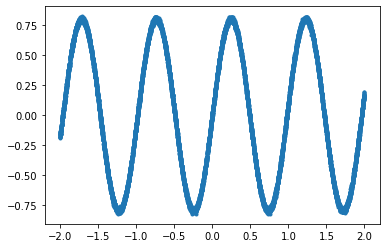

In [9]:
plt.plot(x,y,'.')

In [10]:
x_test=np.linspace(-3,3,1000).reshape(1000,1)
plt.plot(x_test,net.forward(x_test))
# plt.plot(x,y,'.')

NameError: name 'net' is not defined

In [11]:
class BNet2:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.weights.append(initialiser_function(input_dim+1,hidden_layer_sizes[0]))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii]+1,hidden_layer_sizes[ii+1]))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1]+1,output_dim))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
        print(x.shape)
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        x=np.hstack([np.ones((x.shape[0],1)),x])

        for ii in range(len(self.weights)):

            x=x @ self.weights[ii]

#             self.activated.append(x>0)
#             self.z.append(x)
            if not ii== len(self.weights)-1:
                x=np.hstack([np.ones((x.shape[0],1)),x])
                self.activated.append(x>0)
                self.z.append(x)
                x=x*self.activated[ii]
                self.a.append(x)
#             print(x)
                if np.sum(np.sum(self.activated[ii]))==0:
                    print('No activations')
            
        self.z.append(x)
        self.a.append(x)
        self.activated.append(np.ones(x.shape,dtype=bool))
#             print(self.activated)
        return x
    
    def gradients(self,x,Y):
        Delta=[]
        Delta.append((Y-self.a[-1])*self.activated[-1])
        for ll in range(len(self.weights)-2,-1,-1):
#             print(Delta)
#             print(Delta[0].shape)
#             print(self.weights[ll+1].shape)
#             print(self.activated[ll].shape)
            Delta.insert(0,((Delta[0] @ self.weights[ll+1].T)*self.activated[ll])[:,1:])
        
        grad_w=[]
#         self.Delta=Delta
#         print(Delta[0].shape)
        grad_w.append(Delta[0].T @ np.hstack([np.ones((x.shape[0],1)),x]))
        for ll in range(len(Delta)-1):

            grad_w.append(Delta[ll+1].T @ self.a[ll])
            
        return grad_w
    
    def train(self,xx,YY,alpha=0.01, print_error=False):
        
        for ii in range(len(YY)):
            x=xx[ii]
            x=x.reshape((1,x.shape[0]))
            Y=YY[ii]
#             print(Y.shape)
            Y_out=self.forward(x)
            error_out=np.sum((Y-Y_out)**2)
            grad_w=self.gradients(x,Y)
#             print(self.biases)
            for ll in range(len(self.weights)):
#                 print(ll)
#                 print(grad_w[ll].shape)
                self.weights[ll]=self.weights[ll]+alpha*grad_w[ll].T
#                 self.biases[ll]+=alpha*grad_b[ll]
                
            if print_error:
                print(str(ii)+': Error: '+ str(error_out))
            

In [12]:
n_data=10001
x=np.random.rand(n_data,1)*4-2
y= 0.8*np.sin(x*3.4)+np.random.randn(x.shape[0],x.shape[1])*0.1
net=BNet2(hidden_layer_sizes=[16,32,64],input_dim=1,output_dim=1)
net.train(x,y,print_error=True)

(1, 1)
0: Error: 3.135200659283452
(1, 1)
1: Error: 2.4701359554304116
(1, 1)
2: Error: 0.585786916492432
(1, 1)
3: Error: 12.92551548474359
(1, 1)
4: Error: 1.1454709147475277
(1, 1)
5: Error: 1.126874823246466
(1, 1)
6: Error: 1.5018944218249062
(1, 1)
7: Error: 6.137188460330816
(1, 1)
8: Error: 0.7585221526817749
(1, 1)
9: Error: 0.30611933530922525
(1, 1)
10: Error: 0.13093836715596707
(1, 1)
11: Error: 0.02627424639345241
(1, 1)
12: Error: 0.18372991521309154
(1, 1)
13: Error: 0.0032493936490555477
(1, 1)
14: Error: 2.8275826885967636
(1, 1)
15: Error: 0.0488997268844879
(1, 1)
16: Error: 1.6545790423290059
(1, 1)
17: Error: 1.1949578858985193
(1, 1)
18: Error: 1.6964870659209421
(1, 1)
19: Error: 0.8788620540483698
(1, 1)
20: Error: 0.14225373486306866
(1, 1)
21: Error: 0.11003077436434718
(1, 1)
22: Error: 0.00046553771301760316
(1, 1)
23: Error: 0.04124029441951867
(1, 1)
24: Error: 0.046773267059887824
(1, 1)
25: Error: 1.3703001203155338
(1, 1)
26: Error: 0.01175683727315378

524: Error: 0.003102656544870313
(1, 1)
525: Error: 0.06477223010621244
(1, 1)
526: Error: 0.00023969643496330142
(1, 1)
527: Error: 0.23932175036086073
(1, 1)
528: Error: 1.3761639603221636e-05
(1, 1)
529: Error: 0.0005872184929211561
(1, 1)
530: Error: 0.018036941969198198
(1, 1)
531: Error: 0.058070673760915015
(1, 1)
532: Error: 0.06958341426692692
(1, 1)
533: Error: 0.01390711027847734
(1, 1)
534: Error: 0.027814879818916692
(1, 1)
535: Error: 0.00023450768686340766
(1, 1)
536: Error: 8.378324037518259e-07
(1, 1)
537: Error: 0.023487532315561718
(1, 1)
538: Error: 2.3769049777925433e-05
(1, 1)
539: Error: 0.019860735754654246
(1, 1)
540: Error: 0.015917720836721584
(1, 1)
541: Error: 0.010115374495037355
(1, 1)
542: Error: 0.022711469831315775
(1, 1)
543: Error: 0.10001645598920367
(1, 1)
544: Error: 0.07464809393917582
(1, 1)
545: Error: 0.4764887779841433
(1, 1)
546: Error: 0.033638063128193375
(1, 1)
547: Error: 0.021258559124054714
(1, 1)
548: Error: 1.955206465254441e-08
(1, 

1067: Error: 0.4906017529422249
(1, 1)
1068: Error: 0.0007304374172474961
(1, 1)
1069: Error: 0.015490752237675383
(1, 1)
1070: Error: 0.002297899967407253
(1, 1)
1071: Error: 0.29974098616696454
(1, 1)
1072: Error: 0.0028441895167757897
(1, 1)
1073: Error: 0.024451929542985036
(1, 1)
1074: Error: 0.010082685900342772
(1, 1)
1075: Error: 0.004524249877640934
(1, 1)
1076: Error: 0.013862442871237677
(1, 1)
1077: Error: 0.015580523050411552
(1, 1)
1078: Error: 0.00444044143023724
(1, 1)
1079: Error: 0.03596918699791123
(1, 1)
1080: Error: 0.007477535424401985
(1, 1)
1081: Error: 0.014273365204765213
(1, 1)
1082: Error: 0.0021008718346027843
(1, 1)
1083: Error: 0.10273812092837618
(1, 1)
1084: Error: 5.096754797398345e-05
(1, 1)
1085: Error: 0.03025715127522149
(1, 1)
1086: Error: 0.0006776077835119034
(1, 1)
1087: Error: 0.05144301247130515
(1, 1)
1088: Error: 0.0012768015488211898
(1, 1)
1089: Error: 0.002055961979780134
(1, 1)
1090: Error: 0.013536299780426331
(1, 1)
1091: Error: 9.817

1687: Error: 0.0032312102954719234
(1, 1)
1688: Error: 0.0616881758048207
(1, 1)
1689: Error: 0.020475691197076273
(1, 1)
1690: Error: 0.02210685639175729
(1, 1)
1691: Error: 0.01230728798376384
(1, 1)
1692: Error: 0.01660639427531451
(1, 1)
1693: Error: 5.771559992861978e-06
(1, 1)
1694: Error: 0.0044988168960988775
(1, 1)
1695: Error: 0.0006448065577205964
(1, 1)
1696: Error: 0.004300172315447463
(1, 1)
1697: Error: 0.09673279767206575
(1, 1)
1698: Error: 0.0006282716783730687
(1, 1)
1699: Error: 0.0013775583854054039
(1, 1)
1700: Error: 0.020466236779107968
(1, 1)
1701: Error: 0.003274506074315396
(1, 1)
1702: Error: 0.0006518375533300982
(1, 1)
1703: Error: 0.00016811283152363396
(1, 1)
1704: Error: 0.006969516244100546
(1, 1)
1705: Error: 0.02594308006412936
(1, 1)
1706: Error: 0.10568329090626151
(1, 1)
1707: Error: 0.06439451659406913
(1, 1)
1708: Error: 0.12893702614029012
(1, 1)
1709: Error: 0.10623293191527078
(1, 1)
1710: Error: 0.0030682125695775594
(1, 1)
1711: Error: 5.11

2243: Error: 0.030908186612994937
(1, 1)
2244: Error: 0.002531398551337807
(1, 1)
2245: Error: 0.04587647824202573
(1, 1)
2246: Error: 0.13219688841712898
(1, 1)
2247: Error: 0.0024336170494362016
(1, 1)
2248: Error: 0.01361081270923464
(1, 1)
2249: Error: 0.027246626329676837
(1, 1)
2250: Error: 0.0034083309787731123
(1, 1)
2251: Error: 0.0051489824206736
(1, 1)
2252: Error: 0.009137615730340812
(1, 1)
2253: Error: 0.001620454791573943
(1, 1)
2254: Error: 0.002398090673204455
(1, 1)
2255: Error: 0.001751805929742549
(1, 1)
2256: Error: 0.008633983179176366
(1, 1)
2257: Error: 0.008641545612569147
(1, 1)
2258: Error: 0.011978221731243459
(1, 1)
2259: Error: 0.02139381129146936
(1, 1)
2260: Error: 0.03618240415122262
(1, 1)
2261: Error: 0.0021709377068850843
(1, 1)
2262: Error: 0.002239468288612974
(1, 1)
2263: Error: 0.005395389275589157
(1, 1)
2264: Error: 0.005805727051746241
(1, 1)
2265: Error: 0.03331913422379719
(1, 1)
2266: Error: 0.01308378789459277
(1, 1)
2267: Error: 0.0091125

2867: Error: 0.03576902837266766
(1, 1)
2868: Error: 0.0036992931161663727
(1, 1)
2869: Error: 0.025852058432874817
(1, 1)
2870: Error: 0.0018684004723828066
(1, 1)
2871: Error: 0.010798881366812106
(1, 1)
2872: Error: 0.010019663248864987
(1, 1)
2873: Error: 0.00697307786352757
(1, 1)
2874: Error: 0.021882672843924034
(1, 1)
2875: Error: 0.0016804595898304061
(1, 1)
2876: Error: 0.1178076266565384
(1, 1)
2877: Error: 0.024843822521057192
(1, 1)
2878: Error: 9.08442447618271e-05
(1, 1)
2879: Error: 0.014114452807393346
(1, 1)
2880: Error: 0.06052185450988651
(1, 1)
2881: Error: 6.519356561173698e-05
(1, 1)
2882: Error: 0.007059663588732794
(1, 1)
2883: Error: 0.02917285167608078
(1, 1)
2884: Error: 0.0010644013195033504
(1, 1)
2885: Error: 0.000400169063990244
(1, 1)
2886: Error: 0.05367445884920888
(1, 1)
2887: Error: 0.0037903402929027126
(1, 1)
2888: Error: 9.962788840860623e-06
(1, 1)
2889: Error: 1.5509638515788476e-06
(1, 1)
2890: Error: 0.0008135802533568383
(1, 1)
2891: Error: 

3383: Error: 0.0008733894071003155
(1, 1)
3384: Error: 0.0012869068892492896
(1, 1)
3385: Error: 0.02427081044753389
(1, 1)
3386: Error: 0.0033355104239869383
(1, 1)
3387: Error: 0.01970264693571607
(1, 1)
3388: Error: 6.817242078060851e-05
(1, 1)
3389: Error: 1.6789524009936257e-05
(1, 1)
3390: Error: 0.04081892896406056
(1, 1)
3391: Error: 0.11625057659281522
(1, 1)
3392: Error: 0.0004578579576785577
(1, 1)
3393: Error: 0.0005599509012139899
(1, 1)
3394: Error: 0.0012315426195862334
(1, 1)
3395: Error: 0.012184839691561242
(1, 1)
3396: Error: 0.017720581252341733
(1, 1)
3397: Error: 0.015174348045074365
(1, 1)
3398: Error: 0.008447006094963246
(1, 1)
3399: Error: 0.01170989078568892
(1, 1)
3400: Error: 0.003884951807963596
(1, 1)
3401: Error: 0.0010049683665708505
(1, 1)
3402: Error: 0.018454991713064726
(1, 1)
3403: Error: 0.014767751357654978
(1, 1)
3404: Error: 0.0004291542283128962
(1, 1)
3405: Error: 0.0205733202234157
(1, 1)
3406: Error: 0.13642429963532746
(1, 1)
3407: Error: 

3989: Error: 0.005767439635414173
(1, 1)
3990: Error: 5.94724329755963e-05
(1, 1)
3991: Error: 0.0009777615288942133
(1, 1)
3992: Error: 0.004928488045604319
(1, 1)
3993: Error: 0.03233978163867291
(1, 1)
3994: Error: 5.260013634600572e-05
(1, 1)
3995: Error: 0.0013161635941282407
(1, 1)
3996: Error: 0.0036984129138509154
(1, 1)
3997: Error: 0.1261033689923625
(1, 1)
3998: Error: 0.05736374049543003
(1, 1)
3999: Error: 0.06621480538183945
(1, 1)
4000: Error: 0.06178705441613492
(1, 1)
4001: Error: 1.0965358132728359e-05
(1, 1)
4002: Error: 0.003389919886521229
(1, 1)
4003: Error: 0.004843739476666199
(1, 1)
4004: Error: 0.016109133982714578
(1, 1)
4005: Error: 0.0072029240200156604
(1, 1)
4006: Error: 0.020479309849742767
(1, 1)
4007: Error: 0.012393816427546292
(1, 1)
4008: Error: 0.0028647523878261427
(1, 1)
4009: Error: 0.0005362260556265067
(1, 1)
4010: Error: 0.032882478328294315
(1, 1)
4011: Error: 0.008613278414504736
(1, 1)
4012: Error: 2.7721692601434857e-05
(1, 1)
4013: Error

4526: Error: 0.007830900434334624
(1, 1)
4527: Error: 0.013742496264664934
(1, 1)
4528: Error: 0.06090304203013518
(1, 1)
4529: Error: 0.012822018251334055
(1, 1)
4530: Error: 0.0014514019172287675
(1, 1)
4531: Error: 0.0112255516786333
(1, 1)
4532: Error: 0.007658113111004158
(1, 1)
4533: Error: 0.07455011094357845
(1, 1)
4534: Error: 0.08697985355357761
(1, 1)
4535: Error: 0.02311954319155274
(1, 1)
4536: Error: 0.0001780281916693149
(1, 1)
4537: Error: 0.0032183217269210196
(1, 1)
4538: Error: 0.0006984812179301325
(1, 1)
4539: Error: 0.0012987587118364614
(1, 1)
4540: Error: 0.0022474486640378767
(1, 1)
4541: Error: 0.00046046364799721344
(1, 1)
4542: Error: 9.60981072902103e-05
(1, 1)
4543: Error: 0.005342181150089025
(1, 1)
4544: Error: 0.04057466981076484
(1, 1)
4545: Error: 0.0010625994185084738
(1, 1)
4546: Error: 0.0035066668601024375
(1, 1)
4547: Error: 0.0007977150739772751
(1, 1)
4548: Error: 0.001344894331793908
(1, 1)
4549: Error: 0.03015322691371474
(1, 1)
4550: Error: 

5051: Error: 0.2055571137181116
(1, 1)
5052: Error: 0.03875827949375272
(1, 1)
5053: Error: 0.004522425947466525
(1, 1)
5054: Error: 0.02071724631811121
(1, 1)
5055: Error: 0.07416077741009054
(1, 1)
5056: Error: 0.001888113668415856
(1, 1)
5057: Error: 0.040951543674078245
(1, 1)
5058: Error: 0.0013434787359339366
(1, 1)
5059: Error: 0.0005849557778192416
(1, 1)
5060: Error: 0.0011824799611042526
(1, 1)
5061: Error: 0.06215264855465079
(1, 1)
5062: Error: 0.0011757269038710336
(1, 1)
5063: Error: 0.015175473882629043
(1, 1)
5064: Error: 0.10651885450691506
(1, 1)
5065: Error: 0.009210654628728877
(1, 1)
5066: Error: 0.005246124079896341
(1, 1)
5067: Error: 0.004041693458144841
(1, 1)
5068: Error: 0.2662285166180562
(1, 1)
5069: Error: 0.0008718909639913494
(1, 1)
5070: Error: 0.00011110992565649402
(1, 1)
5071: Error: 0.011222537553071071
(1, 1)
5072: Error: 0.026250232342298643
(1, 1)
5073: Error: 0.007486716243443578
(1, 1)
5074: Error: 8.443009128989409e-05
(1, 1)
5075: Error: 0.01

5633: Error: 0.002751190488319873
(1, 1)
5634: Error: 0.03312647959439416
(1, 1)
5635: Error: 0.008018397500847268
(1, 1)
5636: Error: 0.00033417258702946447
(1, 1)
5637: Error: 0.035586093800361616
(1, 1)
5638: Error: 0.02828628150801888
(1, 1)
5639: Error: 0.018793917741506093
(1, 1)
5640: Error: 0.010515889832956206
(1, 1)
5641: Error: 0.015149180405697883
(1, 1)
5642: Error: 0.004110171920939194
(1, 1)
5643: Error: 0.044754047631806355
(1, 1)
5644: Error: 0.003730014063997219
(1, 1)
5645: Error: 0.0073960068794118915
(1, 1)
5646: Error: 0.01664404876278966
(1, 1)
5647: Error: 0.013979204615448809
(1, 1)
5648: Error: 0.019627144029089057
(1, 1)
5649: Error: 0.006519708767314482
(1, 1)
5650: Error: 0.0022734649229004932
(1, 1)
5651: Error: 0.0068543232740845466
(1, 1)
5652: Error: 0.007686232243382016
(1, 1)
5653: Error: 0.019622568645990643
(1, 1)
5654: Error: 0.00803264110597713
(1, 1)
5655: Error: 0.019762995069089972
(1, 1)
5656: Error: 0.0023722546030563816
(1, 1)
5657: Error: 0

6246: Error: 0.002581159133652862
(1, 1)
6247: Error: 0.00470324781764569
(1, 1)
6248: Error: 0.0437583497812436
(1, 1)
6249: Error: 0.03089360829813218
(1, 1)
6250: Error: 0.002724316840560739
(1, 1)
6251: Error: 0.04329771873831218
(1, 1)
6252: Error: 0.04646531848915875
(1, 1)
6253: Error: 0.01269298723132544
(1, 1)
6254: Error: 6.738969726831359e-07
(1, 1)
6255: Error: 0.0015164512553113051
(1, 1)
6256: Error: 0.0025071418386067327
(1, 1)
6257: Error: 0.07760020457614805
(1, 1)
6258: Error: 0.0005896372439392529
(1, 1)
6259: Error: 0.005216689997919074
(1, 1)
6260: Error: 0.011173173122452222
(1, 1)
6261: Error: 0.0287161193878049
(1, 1)
6262: Error: 0.0008880439379734157
(1, 1)
6263: Error: 0.0005534076136843452
(1, 1)
6264: Error: 0.077813583600665
(1, 1)
6265: Error: 0.09336753153873387
(1, 1)
6266: Error: 0.0005761079946103898
(1, 1)
6267: Error: 0.003097239774863171
(1, 1)
6268: Error: 0.02804363697137512
(1, 1)
6269: Error: 0.0020713049078125026
(1, 1)
6270: Error: 0.00750756

6769: Error: 0.00019742313713653966
(1, 1)
6770: Error: 0.0214678917909619
(1, 1)
6771: Error: 0.03102643742991934
(1, 1)
6772: Error: 0.008780676018642413
(1, 1)
6773: Error: 0.011305620306128313
(1, 1)
6774: Error: 0.02806518133196497
(1, 1)
6775: Error: 0.011307497876936004
(1, 1)
6776: Error: 0.0035077439691825097
(1, 1)
6777: Error: 0.018198439952083867
(1, 1)
6778: Error: 0.0026674676091941194
(1, 1)
6779: Error: 0.0076678528255629185
(1, 1)
6780: Error: 0.04300804005642838
(1, 1)
6781: Error: 0.039455285216201806
(1, 1)
6782: Error: 0.076291902017428
(1, 1)
6783: Error: 0.0055525703123268
(1, 1)
6784: Error: 0.057007455483530436
(1, 1)
6785: Error: 0.009631608623297264
(1, 1)
6786: Error: 0.0019875836011021076
(1, 1)
6787: Error: 0.009621695412919528
(1, 1)
6788: Error: 0.004469807149693248
(1, 1)
6789: Error: 0.005281665222299666
(1, 1)
6790: Error: 0.0009266618628471301
(1, 1)
6791: Error: 0.002766848215775373
(1, 1)
6792: Error: 0.013322594165880084
(1, 1)
6793: Error: 6.9328

7374: Error: 0.024170431540017873
(1, 1)
7375: Error: 0.00015643948146318385
(1, 1)
7376: Error: 0.00018117115447228914
(1, 1)
7377: Error: 0.01078968101500307
(1, 1)
7378: Error: 0.0024347301339405266
(1, 1)
7379: Error: 0.0002771708389289491
(1, 1)
7380: Error: 0.030231791374142006
(1, 1)
7381: Error: 0.013643363261386859
(1, 1)
7382: Error: 0.00018684353489390972
(1, 1)
7383: Error: 0.0017737599796792492
(1, 1)
7384: Error: 0.0003851403141755256
(1, 1)
7385: Error: 0.0007316967987771547
(1, 1)
7386: Error: 0.14956961660754478
(1, 1)
7387: Error: 0.022989451719219834
(1, 1)
7388: Error: 0.008334751040503866
(1, 1)
7389: Error: 0.0069431362966694745
(1, 1)
7390: Error: 0.01211490644192576
(1, 1)
7391: Error: 0.011555923075284668
(1, 1)
7392: Error: 0.011798474954002163
(1, 1)
7393: Error: 0.004996936468498396
(1, 1)
7394: Error: 0.011632245068678345
(1, 1)
7395: Error: 0.0996834863741472
(1, 1)
7396: Error: 0.015850175985271674
(1, 1)
7397: Error: 3.812498112129525e-05
(1, 1)
7398: Er

8009: Error: 0.0006585965282882901
(1, 1)
8010: Error: 0.009613192758754165
(1, 1)
8011: Error: 0.004661214455206268
(1, 1)
8012: Error: 0.04915107668154056
(1, 1)
8013: Error: 0.03778117476878337
(1, 1)
8014: Error: 0.00014757943733637139
(1, 1)
8015: Error: 0.006015165773073785
(1, 1)
8016: Error: 0.010083181846420548
(1, 1)
8017: Error: 0.14707763356947476
(1, 1)
8018: Error: 0.0074333082718615875
(1, 1)
8019: Error: 0.02915424656958653
(1, 1)
8020: Error: 0.012653184135286108
(1, 1)
8021: Error: 0.034762229165215215
(1, 1)
8022: Error: 0.03757320438547871
(1, 1)
8023: Error: 0.0004321817624814472
(1, 1)
8024: Error: 0.0007660018781899775
(1, 1)
8025: Error: 0.02570058744413954
(1, 1)
8026: Error: 0.00031568905117962837
(1, 1)
8027: Error: 0.008140393601095315
(1, 1)
8028: Error: 0.013700799554594632
(1, 1)
8029: Error: 0.001341338638689263
(1, 1)
8030: Error: 0.005070904986165997
(1, 1)
8031: Error: 0.046907015504344445
(1, 1)
8032: Error: 0.006968775262987256
(1, 1)
8033: Error: 0

8655: Error: 0.003819946449927615
(1, 1)
8656: Error: 0.006170598459178626
(1, 1)
8657: Error: 0.00019230510227094799
(1, 1)
8658: Error: 0.0037724987166400993
(1, 1)
8659: Error: 0.01043761683766624
(1, 1)
8660: Error: 1.2030675550902678e-05
(1, 1)
8661: Error: 0.00017092055928408202
(1, 1)
8662: Error: 0.01933823622067913
(1, 1)
8663: Error: 0.0044584993844622904
(1, 1)
8664: Error: 0.0004920774735100798
(1, 1)
8665: Error: 0.021166266389902638
(1, 1)
8666: Error: 0.013516317936050659
(1, 1)
8667: Error: 0.005455779595592859
(1, 1)
8668: Error: 0.004592979977608181
(1, 1)
8669: Error: 0.00036430540247091845
(1, 1)
8670: Error: 0.009448092862028228
(1, 1)
8671: Error: 0.0009572917553683834
(1, 1)
8672: Error: 0.027891174403042465
(1, 1)
8673: Error: 0.00011782706589282812
(1, 1)
8674: Error: 0.03480609673158591
(1, 1)
8675: Error: 0.006705697451657007
(1, 1)
8676: Error: 0.022269955040981247
(1, 1)
8677: Error: 0.0460814572702327
(1, 1)
8678: Error: 0.01968324181711325
(1, 1)
8679: Er

9287: Error: 0.00491548490004286
(1, 1)
9288: Error: 0.06419609420421983
(1, 1)
9289: Error: 0.023231383793703684
(1, 1)
9290: Error: 0.014168500856412908
(1, 1)
9291: Error: 0.013296445185438453
(1, 1)
9292: Error: 0.0009981091353712492
(1, 1)
9293: Error: 0.001603404410343151
(1, 1)
9294: Error: 0.0002997736286218132
(1, 1)
9295: Error: 0.01438103741764339
(1, 1)
9296: Error: 0.03306158835317651
(1, 1)
9297: Error: 1.8033374614907876e-05
(1, 1)
9298: Error: 0.011754412969024991
(1, 1)
9299: Error: 0.008177367831705104
(1, 1)
9300: Error: 0.01803888216358371
(1, 1)
9301: Error: 0.009652327104304073
(1, 1)
9302: Error: 0.005417941223716531
(1, 1)
9303: Error: 0.01324254168466591
(1, 1)
9304: Error: 0.01141215082873688
(1, 1)
9305: Error: 0.07841117809363883
(1, 1)
9306: Error: 0.004041338905614114
(1, 1)
9307: Error: 0.0002997985207551685
(1, 1)
9308: Error: 0.009202726209149815
(1, 1)
9309: Error: 6.534708215804656e-05
(1, 1)
9310: Error: 0.006494264154157976
(1, 1)
9311: Error: 0.004

9893: Error: 0.0007146486858981598
(1, 1)
9894: Error: 0.03005842591392442
(1, 1)
9895: Error: 0.01702142216822853
(1, 1)
9896: Error: 0.002062735063610433
(1, 1)
9897: Error: 0.005522714636939997
(1, 1)
9898: Error: 0.014325438506461115
(1, 1)
9899: Error: 0.004698032026319867
(1, 1)
9900: Error: 0.008731573049229033
(1, 1)
9901: Error: 0.01521413576192127
(1, 1)
9902: Error: 0.008974351103265657
(1, 1)
9903: Error: 0.010848724308952507
(1, 1)
9904: Error: 0.03967871815465176
(1, 1)
9905: Error: 0.03283771323126487
(1, 1)
9906: Error: 0.06918478237084028
(1, 1)
9907: Error: 0.0049622215951413105
(1, 1)
9908: Error: 0.011159611177312921
(1, 1)
9909: Error: 0.002807216470489508
(1, 1)
9910: Error: 0.06315428241705551
(1, 1)
9911: Error: 0.0013991375878303677
(1, 1)
9912: Error: 0.0001453557051016904
(1, 1)
9913: Error: 0.005168493098709895
(1, 1)
9914: Error: 0.0015282607255711874
(1, 1)
9915: Error: 0.014868591128672773
(1, 1)
9916: Error: 0.0016482822871707339
(1, 1)
9917: Error: 0.02

(1000, 1)


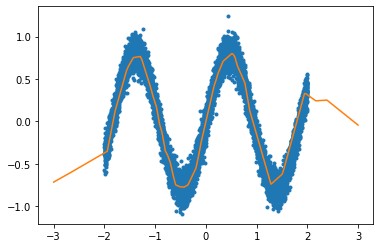

In [13]:
x_test=np.linspace(-3,3,1000).reshape(1000,1)
plt.plot(x,y,'.')
plt.plot(x_test,net.forward(x_test))


In [14]:
class BNet3:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function,lambda_initaliser=lambda_initaliser):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.Lambda=[]
        self.weights.append(initialiser_function(input_dim+1,hidden_layer_sizes[0]))
        self.Lambda.append(lambda_initaliser(input_dim+1))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii]+1,hidden_layer_sizes[ii+1]))
            self.Lambda.append(lambda_initaliser(hidden_layer_sizes[ii]+1))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1]+1,output_dim))
        self.Lambda.append(lambda_initaliser(hidden_layer_sizes[-1]+1))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
#         print(x.shape)
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        x=np.hstack([np.ones((x.shape[0],1)),x])
        all_activated=1
        for ii in range(len(self.weights)):

            x=x @ self.weights[ii]

#             self.activated.append(x>0)
#             self.z.append(x)
            if not ii== len(self.weights)-1:
                x=np.hstack([np.ones((x.shape[0],1)),x])
                self.activated.append(x>0)
                self.z.append(x)
                x=x*self.activated[ii]
                self.a.append(x)
#             print(x)
                if np.sum(np.sum(self.activated[ii][:,1:]))==0:
#                     print('No activations')
                    all_activated=0
        self.z.append(x)
        self.a.append(x)
        self.activated.append(np.ones(x.shape,dtype=bool))
#             print(self.activated)
        return x, all_activated
    
    
    
    def train(self,xx,YY,c=1, print_error=False):
        samples_used=0

        for ii in range(len(YY)):
            x=xx[ii]
            x=x.reshape((1,x.shape[0]))
            Y=YY[ii]
            Y=Y.reshape((1,Y.shape[0]))
#             print(Y.shape)
            Y_out,all_activated=self.forward(x)
            error_out1=np.sum((Y-Y_out)**2)
            if all_activated:
                samples_used+=1
                for ll in range(len(self.weights)-1,-1,-1):
#                     print(ll)
                    xl=self.a[ll-1]
                    if ll==len(self.weights)-1:
                        Yl=Y
                        w=self.weights[ll]
                    else:
#                         print(Yl.shape)
# #                         print(np.linalg.pinv(self.weights[ll+1]).shape)
#                         print(np.linalg.pinv(w).shape)

                        Yl=Yl @ np.linalg.pinv(w)
                        Yl=Yl[:,1:]/Yl[0,0] #the bias isn't an outout of the previous transformation, but we can use it to normalise
#                         print(Yl.shape)
                        Yl=Yl[:,self.activated[ll][0,1:]]
                        w=self.weights[ll][:,self.activated[ll][0,1:]] #this constructs a new weight mat using only the columns that lead to activations
                    L=self.Lambda[ll]
                    
#                     print(xl.T.shape)
#                     print(Yl.shape)
#                     print(L.shape)
#                     print(w.shape)
#                     print(w)
#                     print(w.shape)
#                     print(Yl.shape)

#                     print(xl.shape)
#                     print(w.shape)
#                     print(np.linalg.inv(c*(xl.T @ xl) + L).shape)
#                     print(((xl.T @ Yl)).shape)
#                     print(L.shape)
                    w=np.linalg.inv(c*(xl.T @ xl) + L) @ (c*(xl.T @ Yl) + L @ w)
#                     print(w)
                    w=np.nan_to_num(w)
                    L=c*xl.T @ xl + L
                    if ll==len(self.weights)-1:
                        self.weights[ll]=w
                    else:
                        self.weights[ll][:,self.activated[ll][0,1:]]=w
                    self.Lambda[ll]=L
#                     print(self.weights[ll])
            else:
                print('not today')
            Y_out,all_activated=self.forward(x)

            error_out2=np.sum((Y-Y_out)**2)

            if print_error:
                print(str(ii)+': Error1: '+ str(error_out1)+', Error2: '+ str(error_out2))
        print(samples_used)

NameError: name 'initialiser_function' is not defined

In [1652]:
class BNet4:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function,lambda_initaliser=lambda_initaliser):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.Lambda=[]
        self.weights.append(initialiser_function(input_dim+1,hidden_layer_sizes[0]))
        self.Lambda.append(lambda_initaliser(input_dim+1))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii]+1,hidden_layer_sizes[ii+1]))
            self.Lambda.append(lambda_initaliser(hidden_layer_sizes[ii]+1))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1]+1,output_dim))
        self.Lambda.append(lambda_initaliser(hidden_layer_sizes[-1]+1))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
#         print(x.shape)
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        x=np.hstack([np.ones((x.shape[0],1)),x])
        all_activated=1
        for ii in range(len(self.weights)):

            x=x @ self.weights[ii]

#             self.activated.append(x>0)
#             self.z.append(x)
            if not ii== len(self.weights)-1:
                x=np.hstack([np.ones((x.shape[0],1)),x])
                self.activated.append(x>0)
                self.z.append(x)
                x=x*self.activated[ii]
                self.a.append(x)
#             print(x)
                if np.sum(np.sum(self.activated[ii][:,1:]))==0:
#                     print('No activations')
                    all_activated=0
        self.z.append(x)
        self.a.append(x)
        self.activated.append(np.ones(x.shape,dtype=bool))
#             print(self.activated)
        return x, all_activated
    
    
    
    def train(self,xx,YY,c=1, print_error=False,attempt_numbers=5):
        
        sample_used=np.zeros(len(xx))
        for attempt in range(attempt_numbers):
            
            for ii in range(len(YY)):
                
                if not sample_used[ii]:
                    x=xx[ii]
                    x=x.reshape((1,x.shape[0]))
                    Y=YY[ii]
                    Y=Y.reshape((1,Y.shape[0]))
        #             print(Y.shape)
                    Y_out,all_activated=self.forward(x)
                    error_out1=np.sum((Y-Y_out)**2)
                    if all_activated:
                        sample_used[ii]=1
                        for ll in range(len(self.weights)-1,-1,-1):
        #                     print(ll)
                            xl=self.a[ll-1]
                            if ll==len(self.weights)-1:
                                Yl=Y
                                w=self.weights[ll]
                            else:
        #                         print(Yl.shape)
        # #                         print(np.linalg.pinv(self.weights[ll+1]).shape)
        #                         print(np.linalg.pinv(w).shape)

                                Yl=Yl @ np.linalg.pinv(w)
                                Yl=Yl[:,1:]/Yl[0,0] #the bias isn't an outout of the previous transformation, but we can use it to normalise
        #                         print(Yl.shape)
                                Yl=Yl[:,self.activated[ll][0,1:]]
                                w=self.weights[ll][:,self.activated[ll][0,1:]] #this constructs a new weight mat using only the columns that lead to activations
                            L=self.Lambda[ll]

        #                     print(xl.T.shape)
        #                     print(Yl.shape)
        #                     print(L.shape)
        #                     print(w.shape)
        #                     print(w)
        #                     print(w.shape)
        #                     print(Yl.shape)

        #                     print(xl.shape)
        #                     print(w.shape)
        #                     print(np.linalg.inv(c*(xl.T @ xl) + L).shape)
        #                     print(((xl.T @ Yl)).shape)
        #                     print(L.shape)
                            w=np.linalg.pinv(c*(xl.T @ xl) + L) @ (c*(xl.T @ Yl) + L @ w)
        #                     print(w)
                            w=np.nan_to_num(w)
                            L=c*xl.T @ xl + L
                            if ll==len(self.weights)-1:
                                self.weights[ll]=w
                            else:
                                self.weights[ll][:,self.activated[ll][0,1:]]=w
                            self.Lambda[ll]=L
        #                     print(self.weights[ll])
                    else:
                        print('not today')
                    Y_out,all_activated=self.forward(x)

                    error_out2=np.sum((Y-Y_out)**2)

                    if print_error:
                        print(str(ii)+': Error1: '+ str(error_out1)+', Error2: '+ str(error_out2))
            print(sum(sample_used))

In [19]:
class BNet5:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function,lambda_initaliser=lambda_initaliser):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.Lambda=[]
        self.weights.append(initialiser_function(input_dim+1,hidden_layer_sizes[0]))
        self.Lambda.append(lambda_initaliser(input_dim+1))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii]+1,hidden_layer_sizes[ii+1]))
            self.Lambda.append(lambda_initaliser(hidden_layer_sizes[ii]+1))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1]+1,output_dim))
        self.Lambda.append(lambda_initaliser(hidden_layer_sizes[-1]+1))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
#         print(x.shape)
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        x=np.hstack([np.ones((x.shape[0],1)),x])
        all_activated=1
        for ii in range(len(self.weights)):

            x=x @ self.weights[ii]

#             self.activated.append(x>0)
#             self.z.append(x)
            if not ii== len(self.weights)-1:
                x=np.hstack([np.ones((x.shape[0],1)),x])
                self.activated.append(x>0)
                self.z.append(x)
                x=x*self.activated[ii]
                self.a.append(x)
#             print(x)
                if np.sum(np.sum(self.activated[ii][:,1:]))==0:
#                     print('No activations')
                    all_activated=0
        self.z.append(x)
        self.a.append(x)
        self.activated.append(np.ones(x.shape,dtype=bool))
#             print(self.activated)
        return x, all_activated
    
    
    
    def train(self,xx,YY,passes=1, print_error=False,attempt_numbers=5,total_info=1):
        c=total_info/passes
        sample_used=np.zeros(len(xx))
        for attempt in range(attempt_numbers):
            
            for ii in range(len(YY)):
                
                if not sample_used[ii]:
                    x=xx[ii]
                    x=x.reshape((1,x.shape[0]))
                    Y=YY[ii]
                    Y=Y.reshape((1,Y.shape[0]))
        #             print(Y.shape)
                    Y_out,all_activated=self.forward(x)
#                     all_activated=1
                    error_out1=np.sum((Y-Y_out)**2)
                    if all_activated:
                        sample_used[ii]=1

                        for ps in range(passes):
                            Y_out,all_activated=self.forward(x)

                            for ll in range(len(self.weights)-1,-1,-1):
            #                     print(ll)
                                xl=self.a[ll-1]
                                if ll==len(self.weights)-1:
                                    Yl=Y
                                    w=self.weights[ll]
                                else:
            #                         print(Yl.shape)
            # #                         print(np.linalg.pinv(self.weights[ll+1]).shape)
            #                         print(np.linalg.pinv(w).shape)

                                    Yl=Yl @ np.linalg.pinv(w)
                                    Yl=Yl[:,1:]/Yl[0,0] #the bias isn't an outout of the previous transformation, but we can use it to normalise
            #                         print(Yl.shape)
                                    Yl=Yl[:,self.activated[ll][0,1:]]
                                    w=self.weights[ll][:,self.activated[ll][0,1:]] #this constructs a new weight mat using only the columns that lead to activations
                                L=self.Lambda[ll]

            #                     print(xl.T.shape)
            #                     print(Yl.shape)
            #                     print(L.shape)
            #                     print(w.shape)
            #                     print(w)
            #                     print(w.shape)
            #                     print(Yl.shape)

            #                     print(xl.shape)
            #                     print(w.shape)
            #                     print(np.linalg.inv(c*(xl.T @ xl) + L).shape)
            #                     print(((xl.T @ Yl)).shape)
            #                     print(L.shape)
                                w=np.linalg.pinv(c*(xl.T @ xl) + L) @ (c*(xl.T @ Yl) + L @ w)
            #                     print(w)
                                w=np.nan_to_num(w)
                                L=c*xl.T @ xl + L
                                if ll==len(self.weights)-1:
                                    self.weights[ll]=w
                                else:
                                    self.weights[ll][:,self.activated[ll][0,1:]]=w
                                self.Lambda[ll]=L
            #                     print(self.weights[ll])
                    else:
                        print('not today')
                    Y_out,all_activated=self.forward(x)

                    error_out2=np.sum((Y-Y_out)**2)

                    if print_error:
                        print(str(ii)+': Error1: '+ str(error_out1)+', Error2: '+ str(error_out2))
            print(sum(sample_used))

In [252]:
class BNet6:
    def __init__(self,hidden_layer_sizes, input_dim, output_dim,initialiser_function=initialiser_function,lambda_initaliser=lambda_initaliser):
        self.layer_sizes=hidden_layer_sizes
        self.input_dim=input_dim
        self.output_dim=output_dim
        self.weights=[]
        self.biases=[]
        self.Lambda=[]
        self.weights.append(initialiser_function(input_dim+1,hidden_layer_sizes[0]))
        self.Lambda.append(lambda_initaliser(input_dim+1))
        for ii in range(len(hidden_layer_sizes)-1):
            self.weights.append(initialiser_function(hidden_layer_sizes[ii]+1,hidden_layer_sizes[ii+1]))
            self.Lambda.append(lambda_initaliser(hidden_layer_sizes[ii]+1))
        self.weights.append(initialiser_function(hidden_layer_sizes[-1]+1,output_dim))
        self.Lambda.append(lambda_initaliser(hidden_layer_sizes[-1]+1))
        self.activated=[]
        self.z=[]
        self.a=[]
        self.Delta=[]
    def forward(self,x):
#         print(x.shape)
        self.z=[]
        self.a=[]
        self.activated=[]
#         assert len(x)==self.input_dim
        x=np.hstack([np.ones((x.shape[0],1)),x])
        all_activated=1
        for ii in range(len(self.weights)):

            x=x @ self.weights[ii]

#             self.activated.append(x>0)
#             self.z.append(x)
            if not ii== len(self.weights)-1:
                x=np.hstack([np.ones((x.shape[0],1)),x])
                self.activated.append(x>0)
                self.z.append(x)
                x=x*self.activated[ii]
                self.a.append(x)
#             print(x)
                if np.sum(np.sum(self.activated[ii][:,1:]))==0:
#                     print('No activations')
                    all_activated=0
        self.z.append(x)
        self.a.append(x)
        self.activated.append(np.ones(x.shape,dtype=bool))
#             print(self.activated)
        return x, all_activated
    
    
    
    def train(self,xx,YY,passes=1, print_error=False,failed_attempts=5,total_info=1):
        
        
        c=total_info/passes
        sample_used=np.zeros(len(xx))
        sample_attempted= np.zeros(len(xx))
        
        
        still_going= True
        
        while still_going:
            
            for ii in range(len(YY)):

                if not sample_used[ii]:
                    x=xx[ii]
                    x=x.reshape((1,x.shape[0]))
                    Y=YY[ii]
                    Y=Y.reshape((1,Y.shape[0]))
        #             print(Y.shape)
                    Y_out,all_activated=self.forward(x)
    #                     all_activated=1
                    error_out1=np.sum((Y-Y_out)**2)
                    if all_activated:
                        sample_used[ii]+=1

                        for ps in range(passes):
                            Y_out,all_activated=self.forward(x)

                            for ll in range(len(self.weights)-1,-1,-1):
            #                     print(ll)
                                xl=self.a[ll-1]
                                if ll==len(self.weights)-1:
                                    Yl=Y
                                    w=self.weights[ll]
                                else:
            #                         print(Yl.shape)
            # #                         print(np.linalg.pinv(self.weights[ll+1]).shape)
            #                         print(np.linalg.pinv(w).shape)

                                    Yl=Yl @ np.linalg.pinv(w)
                                    Yl=Yl[:,1:]/Yl[0,0] #the bias isn't an outout of the previous transformation, but we can use it to normalise
            #                         print(Yl.shape)
                                    Yl=Yl[:,self.activated[ll][0,1:]]
                                    w=self.weights[ll][:,self.activated[ll][0,1:]] #this constructs a new weight mat using only the columns that lead to activations
                                L=self.Lambda[ll]

            #                     print(xl.T.shape)
            #                     print(Yl.shape)
            #                     print(L.shape)
            #                     print(w.shape)
            #                     print(w)
            #                     print(w.shape)
            #                     print(Yl.shape)

            #                     print(xl.shape)
            #                     print(w.shape)
            #                     print(np.linalg.inv(c*(xl.T @ xl) + L).shape)
            #                     print(((xl.T @ Yl)).shape)
            #                     print(L.shape)
                                w=np.linalg.pinv(c*(xl.T @ xl) + L) @ (c*(xl.T @ Yl) + L @ w)
            #                     print(w)
                                w=np.nan_to_num(w)
                                L=c*xl.T @ xl + L
                                if ll==len(self.weights)-1:
                                    self.weights[ll]=w
                                else:
                                    self.weights[ll][:,self.activated[ll][0,1:]]=w
                                self.Lambda[ll]=L
            #                     print(self.weights[ll])
                    else:
                        print('not today')
                        sample_attempted[ii]+=1
                    Y_out,all_activated=self.forward(x)

                    error_out2=np.sum((Y-Y_out)**2)

                    if print_error:
                        print(str(ii)+': Error1: '+ str(error_out1)+', Error2: '+ str(error_out2))
            print(sum(sample_used))
            
            if all([(sample_used[ii]==passes or sample_attempted[ii]>= failed_attempts) for ii in range(len(YY))]):
                still_going=0

In [2524]:
any([1,0,0,1])

True

In [2511]:
net=BNet3(hidden_layer_sizes=[16,32,4],input_dim=2,output_dim=1)
net.forward(np.array([[xx[ii],yy[jj]]]))

(array([[1.84658229]]), 1)

In [225]:
def lambda_initaliser(n): #bigger Lambda means smaller effective updates, more regularisation, more precise prior
#     return (np.ones((n,n))+np.eye(n))*1e1
#     return (-1*np.ones((n,n))+np.eye(n)*(n))*1
#     return (np.ones((n,n))+np.diag(np.random.rand(n))+np.random.rand(n,n)*0.1)*1
    return (np.eye(n))*1e-3
#     return np.ones((n,n))*1e-4

In [244]:
def initialiser_function(rows,columns):
#     return np.random.randn(rows,columns)*0.01
    inits=(np.random.randn(rows,columns)*2)*np.sqrt(6)/np.sqrt(rows+columns)
#     inits=(np.random.randn(rows,columns))*0.1#*np.sqrt(6)/np.sqrt(rows+columns)
#     inits=(np.random.rand(rows,columns)*2-1)*np.sqrt(6)/np.sqrt(rows+columns)

    inits[0,:]=np.zeros((1,columns))
    return inits


In [233]:
aa=np.random.rand(5,4)
aa[0,:]=np.zeros((1,4))
aa

array([[0.        , 0.        , 0.        , 0.        ],
       [0.824858  , 0.64212581, 0.53773903, 0.33242831],
       [0.07464681, 0.39707309, 0.08714535, 0.22099138],
       [0.23016701, 0.04727485, 0.19914734, 0.43621588],
       [0.48605605, 0.25146766, 0.98252016, 0.02102843]])

In [234]:
def bias_initialiser(n):

    return (np.random.randn(1,n)*2-1)*np.sqrt(6)/np.sqrt(n+1)


In [235]:
n_data=10001
x=np.random.rand(n_data,1)*4-2
y= 0.8*np.sin(x*3.4)+np.random.randn(x.shape[0],x.shape[1])*0.1
net=BNet4(hidden_layer_sizes=[256],input_dim=1,output_dim=1)
net.train(x,y,print_error=True,c=1)

NameError: name 'BNet4' is not defined

In [247]:
n_data=101
x=np.random.rand(n_data,1)*4-2
y= 0.8*np.sin(x*3.4)+np.random.randn(x.shape[0],x.shape[1])*0.1
net=BNet5(hidden_layer_sizes=[256,256],input_dim=1,output_dim=1,lambda_initaliser=lambda_initaliser,initialiser_function=initialiser_function)
net.train(x,y,print_error=False,passes=1,total_info=1)

101.0
101.0
101.0
101.0
101.0


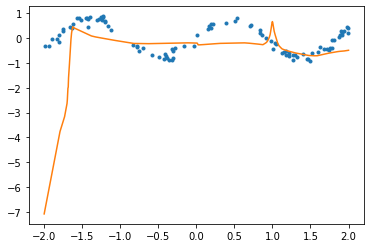

In [248]:
x_test=np.linspace(-2,2,1000).reshape(1000,1)
plt.plot(x,y,'.')
plt.plot(x_test,net.forward(x_test)[0])

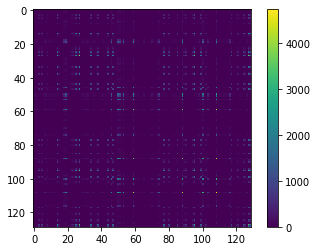

In [2287]:
plt.imshow(net.Lambda[-1]);
plt.colorbar()

In [251]:
n_data=101
x=np.random.rand(n_data,1)*4-2
y= 0.8*np.sin(x*3.4)+np.random.randn(x.shape[0],x.shape[1])*0.1
net=BNet6(hidden_layer_sizes=[256,256],input_dim=1,output_dim=1,lambda_initaliser=lambda_initaliser,initialiser_function=initialiser_function)
net.train(x,y,print_error=False,passes=1,total_info=1)

not today
not today
not today
not today
not today
not today
95.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not t

not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today


not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today


not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today


97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not t

not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today


not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today


not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today


97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not today
not today
not today
not today
97.0
not t

KeyboardInterrupt: 

In [2060]:
net.Lambda[-1]

array([[4.81001000e+03, 8.95623353e+01, 2.65678152e+03, ...,
        0.00000000e+00, 5.87496084e+01, 0.00000000e+00],
       [8.95623353e+01, 8.02151191e+02, 5.06068341e+02, ...,
        0.00000000e+00, 5.26175212e+02, 0.00000000e+00],
       [2.65678152e+03, 5.06068341e+02, 5.40234789e+05, ...,
        0.00000000e+00, 3.31962277e+02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e-02, 0.00000000e+00, 0.00000000e+00],
       [5.87496084e+01, 5.26175212e+02, 3.31962277e+02, ...,
        0.00000000e+00, 3.45161648e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-02]])

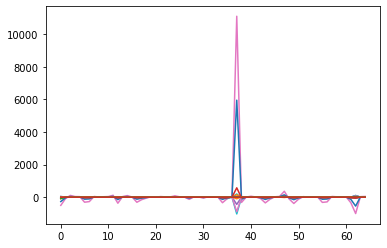

In [2056]:
plt.plot(net.weights[-2]);

In [2422]:

n=4
test_mat=np.ones((n,n))*-1+np.eye(n)*(2*n)
np.linalg.eigvals(test_mat)

array([8., 4., 8., 8.])

In [1210]:
net.weights[-1].shape

(65, 65)

In [1211]:
for ii in range(len(net.a)):
    print(net.weights[ii].shape)
    print(net.a[ii].shape)
    print(net.activated[ii].shape)
    print(net.Lambda[ii].shape)
    print(net.activated[ii][0,0])
    print('=')


(2, 16)
(1, 17)
(1, 17)
(2, 2)
True
=
(17, 32)
(1, 33)
(1, 33)
(17, 17)
True
=
(33, 64)
(1, 65)
(1, 65)
(33, 33)
True
=
(65, 65)
(1, 1)
(1, 1)
(65, 65)
True
=


In [1131]:
act=net.activated[2]
act=act[0][1:]
print(act)

[False False False False False False False False False  True False False
 False False False  True False False False  True False False False  True
  True  True False False False False  True False False False  True  True
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False  True False False False False]


In [1092]:
net.activated[1],net.activated[2]

(array([[ True, False, False, False,  True, False]]),
 array([[ True, False, False, False, False, False,  True, False, False]]))

In [1101]:
net.weights[1][:,net.activated[1][1:]]

IndexError: too many indices for array

In [1132]:
net.weights[1][:,net.activated[0][1:]]

IndexError: too many indices for array

In [1139]:
w1=net.weights[1][:,net.activated[1][0,1:]]*0
net.weights[1][:,net.activated[1][0,1:]]=w1

In [1140]:
net.weights[1]

array([[ 0.55744525,  0.        , -0.7800366 , ..., -0.5559817 ,
        -1.42606018, -1.03379201],
       [-0.24466693,  0.        ,  0.1675472 , ..., -0.08595437,
        -1.14494773,  0.7136729 ],
       [-0.38245529,  0.        , -0.41752633, ..., -0.09299794,
         0.06599596, -0.68979538],
       ...,
       [ 0.14552968,  0.        , -0.22782578, ..., -0.01836428,
        -0.15015018, -0.30338555],
       [-0.60819011, -0.        , -0.65046786, ..., -0.7079431 ,
        -1.37542457, -0.01909586],
       [-1.329441  , -0.        , -0.51497712, ...,  0.84093098,
        -0.64031086, -0.10446233]])

In [1125]:
net.weights[1].shape,net.activated[1][0,1:].shape

((4, 5), (5,))

In [462]:
for ii in range(10-1,-1,-1):
    print(ii)

9
8
7
6
5
4
3
2
1
0


In [4]:
def initialiser_function(rows,columns):
#     return np.random.randn(rows,columns)*0.01
    return (np.random.randn(rows,columns)*2-1)*np.sqrt(6)/np.sqrt(rows+columns)


In [5]:
def bias_initialiser(n):

    return (np.random.randn(1,n)*2-1)*np.sqrt(6)/np.sqrt(n+1)


In [1601]:
def lambda_initaliser(n):
#     return (np.ones((n,n))+np.eye(n))*1e-4
    return (np.ones((n,n))+np.diag(np.random.rand(n)))*0.001
#     return (np.eye(n))*0.0001


In [1044]:
lambda_initaliser(2)

array([[2., 1.],
       [1., 2.]])

In [478]:
net.a

[array([[ 0.58721074, -0.        , -0.        ,  0.58575497,  1.31013563,
          0.36786365, -0.        ,  1.32343058]]),
 array([[-0.        , -0.        , -0.        , -0.        ,  2.3692533 ,
         -0.        ,  1.36160301, -0.        ,  2.28815864, -0.        ,
         -0.        , -0.        ,  0.70630497, -0.        ,  1.05990394,
         -0.        ]]),
 array([[ 4.01305589, -0.        ,  3.6618524 , -0.        , -0.        ,
         -0.        , -0.        , -0.        ]]),
 array([[-7.54137738]])]

In [479]:
net.z

[array([[ 0.58721074, -1.06884997, -1.05099291,  0.58575497,  1.31013563,
          0.36786365, -0.22442577,  1.32343058]]),
 array([[-1.27435754, -3.86372857, -3.8807738 , -4.78211928,  2.3692533 ,
         -2.91039549,  1.36160301, -1.02095848,  2.28815864, -2.7847194 ,
         -0.79517701, -5.89048072,  0.70630497, -2.25987908,  1.05990394,
         -3.6362263 ]]),
 array([[ 4.01305589, -2.39940338,  3.6618524 , -7.66835425, -0.36820166,
         -0.21792112, -8.72780083, -4.0131446 ]]),
 array([[-7.54137738]])]

In [480]:
net.activated

[array([[ True, False, False,  True,  True,  True, False,  True]]),
 array([[False, False, False, False,  True, False,  True, False,  True,
         False, False, False,  True, False,  True, False]]),
 array([[ True, False,  True, False, False, False, False, False]]),
 array([[False]])]

In [465]:
net=BNet(hidden_layer_sizes=[30,40,30],input_dim=2,output_dim=1)

In [466]:
xx=np.linspace(-10,10,101).T
plt.plot(xx,net.forward(xx.reshape(101,1)))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [1009]:
net=BNet(hidden_layer_sizes=[128,256,16],input_dim=2,output_dim=1)
nn=101
xx=np.linspace(-5,5,nn)/10
yy=np.linspace(-5,5,nn)/10
aa=np.zeros((nn,nn))
    
for ii in range(nn):
    for jj in range(nn):
        aa[ii,jj]=net.forward(np.array([[xx[ii],yy[jj]]]))

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activations
No activat

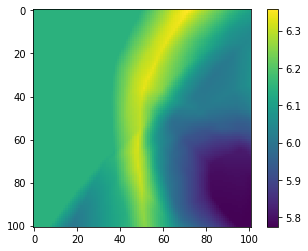

In [1010]:
plt.imshow(aa)
plt.colorbar()

In [458]:
xx.reshape((1,101))

array([[-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
        -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
        -0.84, -0.78, -0.72, -0.66, -0.6 , -0.54, -0.48, -0.42, -0.36,
        -0.3 , -0.24, -0.18, -0.12, -0.06,  0.  ,  0.06,  0.12,  0.18,
         0.24,  0.3 ,  0.36,  0.42,  0.48,  0.54,  0.6 ,  0.66,  0.72,
         0.78,  0.84,  0.9 ,  0.96,  1.02,  1.08,  1.14,  1.2 ,  1.26,
         1.32,  1.38,  1.44,  1.5 ,  1.56,  1.62,  1.68,  1.74,  1.8 ,
         1.86,  1.92,  1.98,  2.04,  2.1 ,  2.16,  2.22,  2.28,  2.34,
         2.4 ,  2.46,  2.52,  2.58,  2.64,  2.7 ,  2.76,  2.82,  2.88,
         2.94,  3.  ]])

In [233]:
xx=np.random.rand(1,2)

In [240]:
for ii in range(10):
    print('====')
    net=BNet(hidden_layer_sizes=[24,32,24],input_dim=2,output_dim=10)
    xx=np.random.rand(1,2)
    net.forward(xx)

====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3
====
0
1
2
3


In [241]:
net.forward(xx)

0
1
2
3


array([[-0.        , -0.        , -0.        , -0.        ,  0.0930992 ,
        -0.        , -0.        , -0.        ,  3.65066283, -0.        ]])

In [405]:
net=BNet(hidden_layer_sizes=[3,4],input_dim=2,output_dim=1)
xx=np.random.rand(1,2)
net.forward(xx)

array([[-56424.94151738]])

In [265]:
net.activated

[array([[False, False, False, False, False,  True, False, False, False,
         False,  True, False,  True, False, False,  True, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True,  True]]),
 array([[False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False]]),
 array([[ True]])]

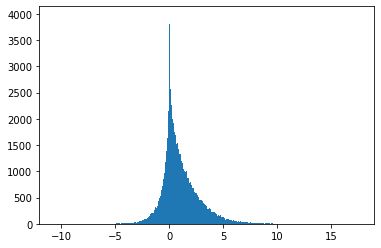

In [2570]:
XX=np.random.randn(200000,2)+1

x=np.linspace(-6,6,100)
sig=np.sqrt(2)
mu=0
# y=1/(sig*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2))*20000
plt.hist(np.prod(XX,1),bins=1000);
# plt.plot(x,y)